# Library load

In [1]:
library(ggplot2)
library(ggbiplot)
library(dplyr)
library(tidyr)
library(gridExtra) 
library(hexbin)
library(RColorBrewer)
library(factoextra)

Loading required package: plyr
Loading required package: scales
Loading required package: grid

Attaching package: ‘dplyr’

The following objects are masked from ‘package:plyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


# Introduction

This data was obtained from the FANTOM CAGE data from three donors whose macrophages were treated with LPS (http://fantom.gsc.riken.jp/5/sstar/Macrophage_response_to_LPS). Possible paper that corresponds to this study (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5358891/pdf/pgen.1006641.pdf).



# Load in the data

## Results from TFEA

In [2]:
tfiles = list.files(path='/scratch/Shares/dowell/FANTOM_Macrophage_LPS/TFEA', 
                     pattern='*TFEA.txt', full.names=TRUE)

myfiles = lapply(tfiles, read.delim) #read txt files

In [3]:
names(myfiles) <- lapply(strsplit(tfiles, '/'), `[`, 7)
file_names <- lapply(strsplit(tfiles, '/'), `[`, 7)

# Functions for exploring the data

In [4]:
get_dataframes <- function(df, dfnames){
    
    ##identify the samples
    id <- as.character(dfnames)
    
    #select TF, AUC and pvalue columns
    newdf <- as.data.frame(df)[c(1,3,8)]
    
    #specify the rownames as the unique TFs
    rownames(newdf) <- newdf[,1]
    newdf_sig <- newdf[c(1,2,3)]
    
    colnames(newdf_sig) <- c('X.TF',paste0('AUC-',id), 
                             paste0('pval-',id))
    
    #return the new data.frame with TF, pval and AUC
    return(newdf_sig)   
    
}

In [5]:
get_AUC <- function(df, dfnames){
    
    ##sample names?
    id <- as.character(dfnames)
    
    #select TF, AUC and pvalue columns
    newdf <- as.data.frame(df)[c(1,3,8)]
    
    #specify the rownames as the unique TFs
    rownames(newdf) <- newdf[,1]
    newdf_sig <- newdf[c(1,2)]
    
    colnames(newdf_sig) <- c('X.TF',id)
    
    
    #return the new data.frame with AUCs
    return(newdf_sig)   
    
}

In [6]:
get_pval <- function(df, dfnames){
    
    ##tfiles
    id <- as.character(dfnames)
    #print(id)
    
    #select TF, AUC and pvalue columns
    newdf <- as.data.frame(df)[c(1,3,8)]
    
    #specify the rownames as the unique TFs
    rownames(newdf) <- newdf[,1]
    newdf_sig <- newdf[c(1,3)]
    
    colnames(newdf_sig) <- c('X.TF', id)
    

    #return the new data.frame with p-values only
    return(newdf_sig)   
    
}

In [7]:
Nlist <- length(myfiles)
tfea_res <- list() 
tfea_auc <- list()
tfea_pvl <- list()

for(i in 1:Nlist){
    
    ##filter the AUC and p-values
    tfea <- get_dataframes(df=myfiles[i], dfnames=file_names[i])
    auc <- get_AUC(df=myfiles[i], dfnames=file_names[i])
    pval <- get_pval(df=myfiles[i], dfnames=file_names[i])
    
    tfea_res[[i]] <- tfea
    tfea_auc[[i]] <- auc
    tfea_pvl[[i]] <- pval
     
}

In [8]:
##merge all the data sets base on the time series
tfea_res_df <- Reduce(function(...) merge(...,by="X.TF", all=T), tfea_res)
tfea_auc_df <- Reduce(function(...) merge(...,by="X.TF", all=T), tfea_auc)
tfea_pvl_df <- Reduce(function(...) merge(...,by="X.TF", all=T), tfea_pvl)                       
                                         

In [9]:
head(tfea_res_df, 3)

X.TF,AUC-00hr00mindonor1_02hr30mindonor1_TFEA.txt,pval-00hr00mindonor1_02hr30mindonor1_TFEA.txt,AUC-00hr00mindonor1_03hr00mindonor1_TFEA.txt,pval-00hr00mindonor1_03hr00mindonor1_TFEA.txt,AUC-00hr00mindonor1_05hrdonor1_TFEA.txt,pval-00hr00mindonor1_05hrdonor1_TFEA.txt,AUC-00hr00mindonor1_08hrdonor1_TFEA.txt,pval-00hr00mindonor1_08hrdonor1_TFEA.txt,AUC-00hr00mindonor1_12hrdonor1_TFEA.txt,⋯,AUC-00hr00mindonor3_18hrdonor3_TFEA.txt,pval-00hr00mindonor3_18hrdonor3_TFEA.txt,AUC-00hr00mindonor3_20hrdonor3_TFEA.txt,pval-00hr00mindonor3_20hrdonor3_TFEA.txt,AUC-00hr00mindonor3_22hrdonor3_TFEA.txt,pval-00hr00mindonor3_22hrdonor3_TFEA.txt,AUC-00hr00mindonor3_24hrdonor3_TFEA.txt,pval-00hr00mindonor3_24hrdonor3_TFEA.txt,AUC-00hr00mindonor3_36hrdonor3_TFEA.txt,pval-00hr00mindonor3_36hrdonor3_TFEA.txt
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AHR_HUMAN.H11MO.0.B,0.000000000,1,0.000000000,1,0.0000000000,1,0.0000000000,1,0.000000000,⋯,0.00000000,1,0.0000000000,1,0.000000000,1,0.000000000,1,0.000000000,1
AIRE_HUMAN.H11MO.0.C,-0.010904370,1,0.011801173,1,-0.0009616738,1,-0.0218450176,1,-0.002856236,⋯,-0.02347531,1,-0.0136549945,1,-0.009096563,1,0.003006025,1,-0.020003725,1
ALX1_HUMAN.H11MO.0.B,0.006691529,1,0.002133694,1,-0.0308720543,1,0.0006861956,1,0.001127235,⋯,0.01425219,1,-0.0002154168,1,0.005572385,1,-0.008935709,1,0.009207235,1


# Analyzing the full timeseries

## Subsetting the data

The data was filtered by the specific donor such that donor1, donor2 and donor3 had their own dataframe.  

In [10]:

##subset datasets by donors
lps_auc_donor1 <- tfea_auc_df[,colnames(tfea_auc_df) %in% grep("donor1", colnames(tfea_auc_df),perl=TRUE, value=TRUE)]
lps_auc_donor2 <- tfea_auc_df[,colnames(tfea_auc_df) %in% grep("donor2", colnames(tfea_auc_df),perl=TRUE, value=TRUE)]
lps_auc_donor3 <- tfea_auc_df[,colnames(tfea_auc_df) %in% grep("donor3", colnames(tfea_auc_df),perl=TRUE, value=TRUE)]

#assign rownames at TFs
rownames(lps_auc_donor1) <- as.character(tfea_auc_df[,c(1)])
rownames(lps_auc_donor2) <- as.character(tfea_auc_df[,c(1)])
rownames(lps_auc_donor3) <- as.character(tfea_auc_df[,c(1)])

## Summary distributions of the AUCs 

The violin plots for the AUCs show no obvious outliers across all time points for all donors. However, the AUC dustibution tightens over time for each donor.

In [11]:
auc_df <- as.data.frame(tfea_auc_df)
rownames(auc_df) <- auc_df$X.TF   

##rearrange the dataframe for plotting purposes
auc_df_gather <- auc_df%>% gather_("key","val", setdiff(names(.), "X.TF"))

In [12]:
pval_df <- as.data.frame(tfea_pvl_df)
rownames(pval_df) <- pval_df$X.TF   

##rearrange the dataframe for plotting purposes
pval_df_gather <- pval_df%>% gather_("pkey","pval", setdiff(names(.), "X.TF"))

full_gathered_df <- cbind(auc_df_gather,pval_df_gather[c(3)])

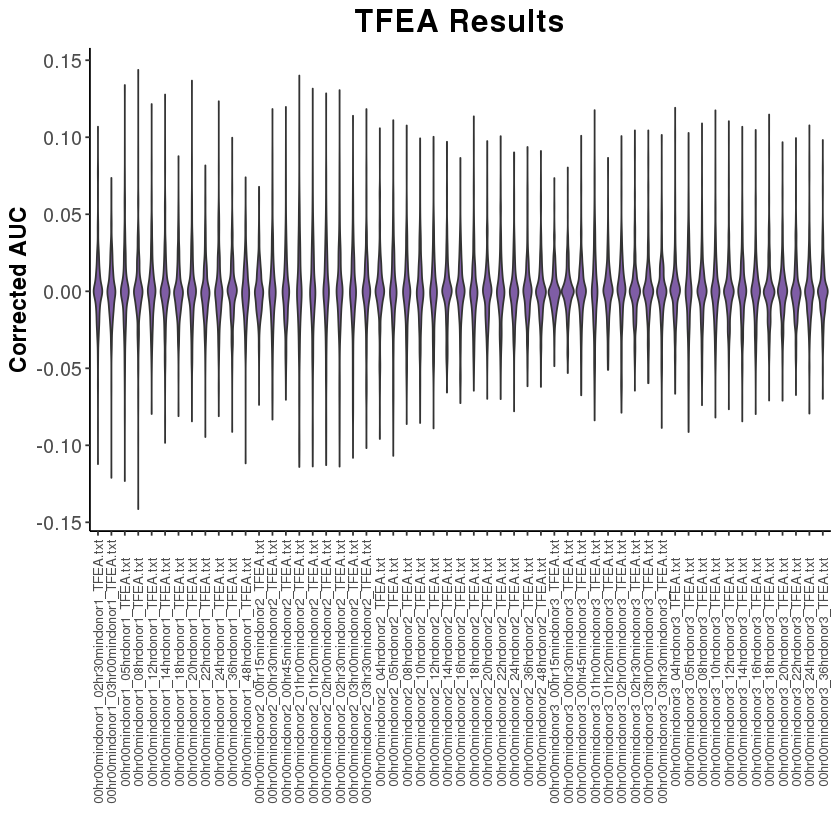

In [13]:
# Basic violin plot
p <- ggplot(auc_df_gather, aes(x=key, y=val)) + 
geom_violin(fill='#542788', alpha=0.75) + 
theme_classic() + 
labs(title="TFEA Results", y="Corrected AUC", x = "" ) +
theme(plot.title = element_text(hjust = 0.5),
      title = element_text(size = 16, face = "bold"), 
      axis.title = element_text(size = 14,face = "bold"), 
      axis.text = element_text(size = 12),
      axis.text.x = element_text(size = 8, angle = 90, 
      hjust = 0.5, vjust = 0.5))

p

## Cluster analysis

### Exploring all 3 donors with K-means clustering (k=6)

Based on Total Within Sum of Square (using the elbow method) for the three donors, the optimal number of clusters is 5/6. So, for all the three donors, we are looking at 6 clusters.

In [14]:
##determining how many clusters to generate

set.seed(123)

donor1 <- fviz_nbclust(lps_auc_donor1, 
                      kmeans, 
                      method = "wss",
                      k.max = 15, nboot = 50,
                      verbose = TRUE)

donor2 <- fviz_nbclust(lps_auc_donor2, 
                      kmeans, 
                      method = "wss",
                      k.max = 15, nboot = 50,
                      verbose = TRUE)

donor3 <- fviz_nbclust(lps_auc_donor3, 
                      kmeans, 
                      method = "wss",
                      k.max = 15, nboot = 50,
                      verbose = TRUE)



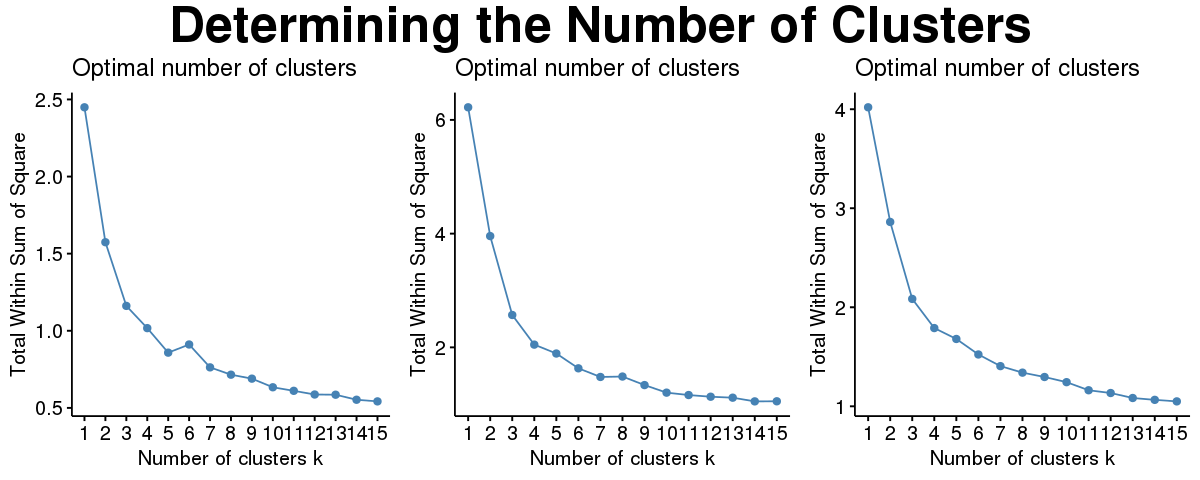

In [15]:
##plots WSS per sample to determine number clusters
##Control_l, Duchenne_1, Duchenne_2, Duchenne_3
options(repr.plot.width=10, repr.plot.height=4)

grid.arrange(donor1, donor2, donor3, nrow = 1,
            top = textGrob("Determining the Number of Clusters",
                            gp=gpar(fontsize=30,font=2)))

In [16]:
restructure_df <- function(df, cols, levels){
    
    df <- df[-ncol(df)]
    df$TF <- rownames(df)
    colnames(df) <- cols
    
    df_gather <- df %>% gather("key","val", setdiff(names(.), "TF"))
    
    ##specify the factors for ordering the variables
    df_gather$keys <- factor(df_gather$key,
                           levels=levels)
    return(df_gather)
}




In [17]:
plot_tfea_auc <- function(df, main, cols, levels, breaks, labels, colour_main, colour_minor){
    
    df_gather <- restructure_df(df, cols, levels )
    
    ########################################################
    ########Now plotting the clusters as line plots#########
    ########################################################

    df_line <- ggplot(data=df_gather, aes(x=keys, y=val, group=TF)) +
                        geom_line(linetype = "dotted",size=0.25, colour=colour_minor, alpha=0.75)+  
                        geom_point(size=0.05, colour=colour_minor, alpha=0.95)+ 
                        labs(title = main,
                             x = " ", y = "Corrected AUC") + 
                        theme_classic() + 
                        scale_y_continuous(expand = c(0.01,0),limits = c(-0.15, 0.15)) +
                        scale_x_discrete(limit=breaks,
                                         labels=labels,
                                         expand=c(0.01, 0.01))+
                        theme(plot.title = element_text(hjust = 0.5),
                              title = element_text(size = 16, face = "bold"), 
                              axis.title = element_text(size = 14), 
                              axis.text = element_text(size = 12),
                              axis.text.x = element_text(size = 12, angle = 90, 
                                                         hjust = 0.5, vjust = 0.5)) +
                        stat_summary(fun.y=mean,geom="line",lwd=0.7,
                                     aes(group=1), colour=colour_main) ##542788

    df_line
}

In [18]:
clustering_by_auc <- function(data_input, clusters=6){
    
    set.seed(123)
    control_k <- kmeans(data_input, centers = clusters, nstart = 25)
    data_input$cluster <- control_k$cluster

    return(data_input)
}

In [19]:
plotting_clusters <- function(cluster_df_list, main_main, 
                              cols, levels, breaks, labels,
                              colour_main, colour_minor){
    
    control_df <- cluster_df_list

    ##control
    c.c1 <- subset(control_df, cluster == 1 )
    c.c2 <- subset(control_df, cluster == 2 )
    c.c3 <- subset(control_df, cluster == 3 )
    c.c4 <- subset(control_df, cluster == 4 )
    c.c5 <- subset(control_df, cluster == 5 )
    c.c6 <- subset(control_df, cluster == 6 )
    
    ##line plot for all
    options(repr.plot.width=12, repr.plot.height=8)

    grid.arrange(plot_tfea_auc(c.c1, "Cluster 1", cols, levels, 
                               breaks, labels, colour_main, colour_minor), 
                 plot_tfea_auc(c.c2, "Cluster 2", cols, levels, 
                               breaks, labels, colour_main, colour_minor), 
                 plot_tfea_auc(c.c3, "Cluster 3", cols, levels,
                               breaks, labels, colour_main, colour_minor), 
                 plot_tfea_auc(c.c4, "Cluster 4", cols, levels,
                               breaks, labels, colour_main, colour_minor),
                 plot_tfea_auc(c.c5, "Cluster 5", cols, levels,
                               breaks, labels, colour_main, colour_minor), 
                 plot_tfea_auc(c.c6, "Cluster 6", cols, levels, 
                               breaks, labels, colour_main, colour_minor),
                 top = textGrob(main_main,
                                gp=gpar(fontsize=15,font=3)),
                 nrow = 2)
}

In [20]:
##create brakes for donor1
colname_days1 <- c("T0_2hr30min","T0_3hr00min","T0_5hr00min","T0_8hr00min",
                   "T0_12hr00min","T0_14hr00min","T0_18hr00min",
                   "T0_20hr00min","T0_22hr00min","T0_24hr00min",
                   "T0_36hr00min","T0_48hr00min","TF")

level_days1 <- c("T0_2hr30min","T0_3hr00min","T0_5hr00min","T0_8hr00min",
                 "T0_12hr00min","T0_14hr00min","T0_18hr00min",
                 "T0_20hr00min","T0_22hr00min","T0_24hr00min",
                 "T0_36hr00min","T0_48hr00min")

plot_limits1 <- c("T0_2hr30min","z3","T0_3hr00min","z4","z5","zz1","zz2","T0_5hr00min","zz3","zz4",
                  "T0_8hr00min","zz4","zz5","zz6","zz7","T0_12hr00min","zz8","zz9",
                  "T0_14hr00min","zz10","zz11","xx11","zz12","zz13",
                 "T0_18hr00min","zz14","zz15","T0_20hr00min","zz16","zz17",
                  "T0_22hr00min","zz18","zz19","T0_24hr00min","zzz1","zzz2","zzz3","zzz4",
                 "T0_36hr00min","zzz5","zzz6","zzz7","zzz8","T0_48hr00min")


plot_labels1 <- c("T0_2hr30min"," ","T0_3hr00min"," "," "," "," ","T0_5hr00min"," "," ",
                  "T0_8hr00min"," "," "," "," ","T0_12hr00min"," "," ",
                  "T0_14hr00min"," "," "," "," "," ",
                 "T0_18hr00min"," "," ","T0_20hr00min"," "," ",
                  "T0_22hr00min"," "," ","T0_24hr00min"," "," "," "," ",
                 "T0_36hr00min"," "," "," "," ","T0_48hr00min")


In [21]:
##create brakes for donor2
colname_days2 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                   "T0_1hr20min","T0_2hr00min","T0_2hr30min","T0_3hr00min",
                   "T0_3hr30min","T0_4hr00min","T0_5hr00min","T0_8hr00min",
                   "T0_10hr00min","T0_12hr00min","T0_14hr00min","T0_16hr00min",
                   "T0_18hr00min","T0_20hr00min","T0_22hr00min","T0_24hr00min",
                   "T0_36hr00min","T0_48hr00min","TF")

level_days2 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","T0_2hr00min","T0_2hr30min","T0_3hr00min",
                 "T0_3hr30min","T0_4hr00min","T0_5hr00min","T0_8hr00min",
                 "T0_10hr00min","T0_12hr00min","T0_14hr00min","T0_16hr00min",
                 "T0_18hr00min","T0_20hr00min","T0_22hr00min","T0_24hr00min",
                 "T0_36hr00min","T0_48hr00min")

plot_limits2 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","z1","T0_2hr00min","z2","T0_2hr30min","z3","T0_3hr00min",
                 "z4","T0_3hr30min","z5","T0_4hr00min","zz1","zz2","T0_5hr00min","zz3","zz4",
                  "T0_8hr00min","zz4","zz5","T0_10hr00min","zz6","zz7","T0_12hr00min","zz8","zz9",
                  "T0_14hr00min","zz10","zz11","T0_16hr00min","zz12","zz13",
                 "T0_18hr00min","zz14","zz15","T0_20hr00min","zz16","zz17",
                  "T0_22hr00min","zz18","zz19","T0_24hr00min","zzz1","zzz2","zzz3","zzz4",
                 "T0_36hr00min","zzz5","zzz6","zzz7","zzz8","T0_48hr00min")


plot_labels2 <- c("T0 vs 0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min"," ","T0_2hr00min"," ","T0_2hr30min"," ","T0_3hr00min",
                 " ","T0_3hr30min"," ","T0_4hr00min"," "," ","T0_5hr00min"," "," ",
                  "T0_8hr00min"," "," ","T0_10hr00min"," "," ","T0_12hr00min"," "," ",
                  "T0_14hr00min"," "," ","T0_16hr00min"," "," ",
                 "T0_18hr00min"," "," ","T0_20hr00min"," "," ",
                  "T0_22hr00min"," "," ","T0_24hr00min"," "," "," "," ",
                 "T0_36hr00min"," "," "," "," ","T0_48hr00min")

In [22]:
##create brakes for donor3
colname_days3 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                   "T0_1hr20min","T0_2hr00min","T0_2hr30min","T0_3hr00min",
                   "T0_3hr30min","T0_4hr00min","T0_5hr00min","T0_8hr00min",
                   "T0_10hr00min","T0_12hr00min","T0_14hr00min","T0_16hr00min",
                   "T0_18hr00min","T0_20hr00min","T0_22hr00min","T0_24hr00min",
                   "T0_36hr00min","TF")

level_days3 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","T0_2hr00min","T0_2hr30min","T0_3hr00min",
                 "T0_3hr30min","T0_4hr00min","T0_5hr00min","T0_8hr00min",
                 "T0_10hr00min","T0_12hr00min","T0_14hr00min","T0_16hr00min",
                 "T0_18hr00min","T0_20hr00min","T0_22hr00min","T0_24hr00min",
                 "T0_36hr00min")

plot_limits3 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","z1","T0_2hr00min","z2","T0_2hr30min","z3","T0_3hr00min",
                 "z4","T0_3hr30min","z5","T0_4hr00min","zz1","zz2","T0_5hr00min","zz3","zz4",
                  "T0_8hr00min","zz4","zz5","T0_10hr00min","zz6","zz7","T0_12hr00min","zz8","zz9",
                  "T0_14hr00min","zz10","zz11","T0_16hr00min","zz12","zz13",
                 "T0_18hr00min","zz14","zz15","T0_20hr00min","zz16","zz17",
                  "T0_22hr00min","zz18","zz19","T0_24hr00min","zzz1","zzz2","zzz3","zzz4",
                 "T0_36hr00min")


plot_labels3 <- c("T0 vs 0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min"," ","T0_2hr00min"," ","T0_2hr30min"," ","T0_3hr00min",
                 " ","T0_3hr30min"," ","T0_4hr00min"," "," ","T0_5hr00min"," "," ",
                  "T0_8hr00min"," "," ","T0_10hr00min"," "," ","T0_12hr00min"," "," ",
                  "T0_14hr00min"," "," ","T0_16hr00min"," "," ",
                 "T0_18hr00min"," "," ","T0_20hr00min"," "," ",
                  "T0_22hr00min"," "," ","T0_24hr00min"," "," "," "," ",
                 "T0_36hr00min")

In [23]:
cluster_analysis <- function(input_df, main_main, cols,
                             levels, breaks, labels,  
                             colour_main, colour_minor) {
    
    cluster_data <- clustering_by_auc(data_input=input_df)
    
    plotting_clusters(cluster_data, main_main, cols, levels,
                      breaks, labels, colour_main, colour_minor )
}

In [24]:
donor1_clusters <- clustering_by_auc(data_input=lps_auc_donor1)
donor2_clusters <- clustering_by_auc(data_input=lps_auc_donor2)
donor3_clusters <- clustering_by_auc(data_input=lps_auc_donor3)

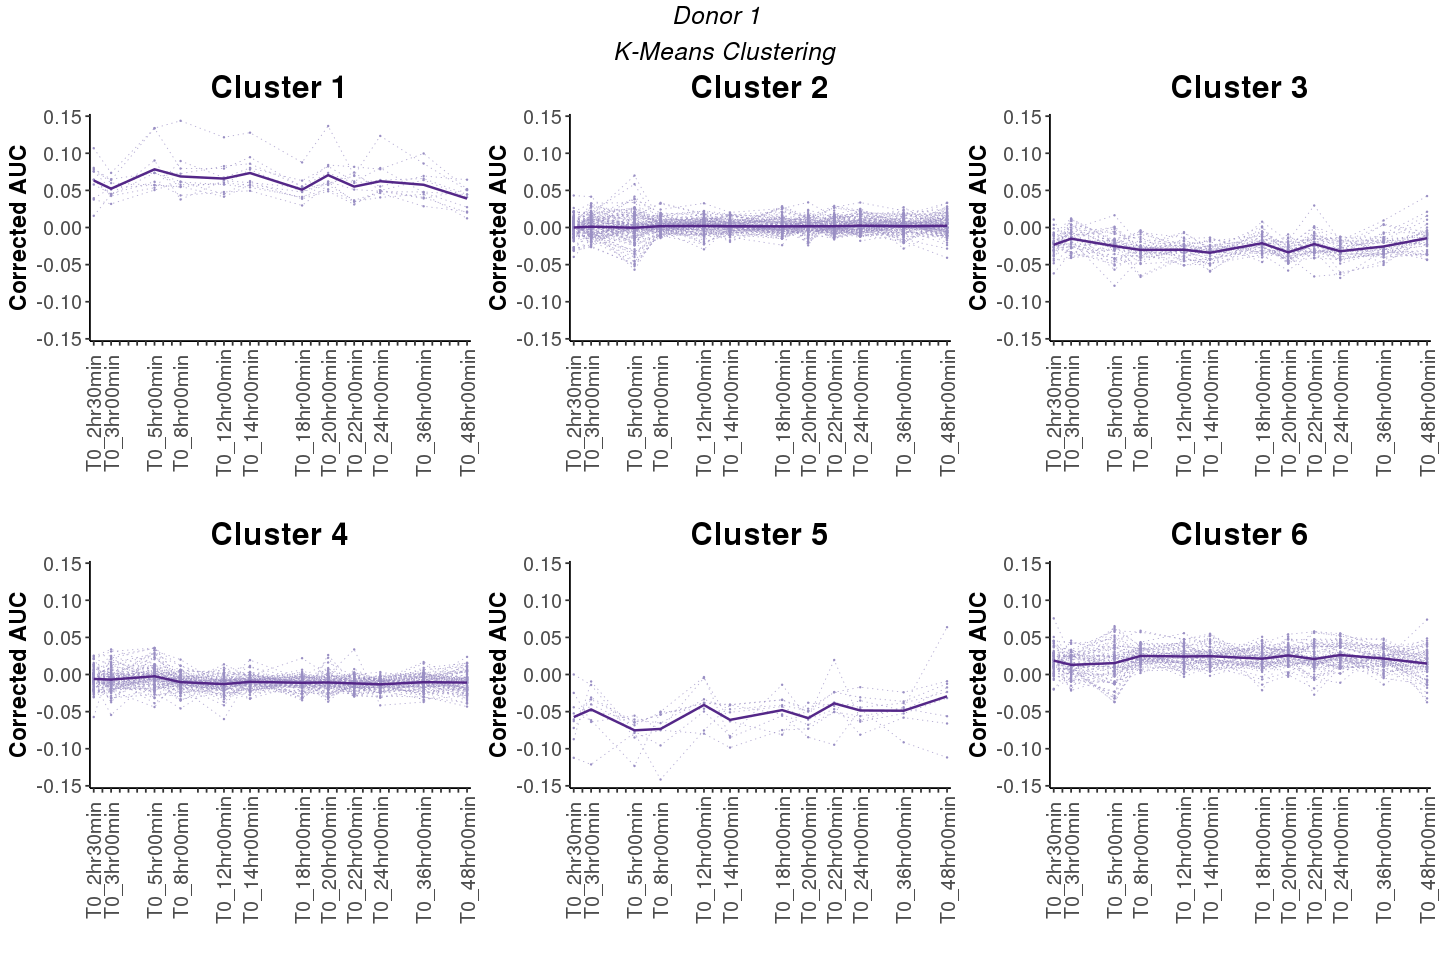

In [25]:
cluster_analysis(lps_auc_donor1, 
                 "Donor 1 \n K-Means Clustering",
                colname_days1,
                level_days1,
                plot_limits1,
                plot_labels1,
                "#542788","#998ec3")

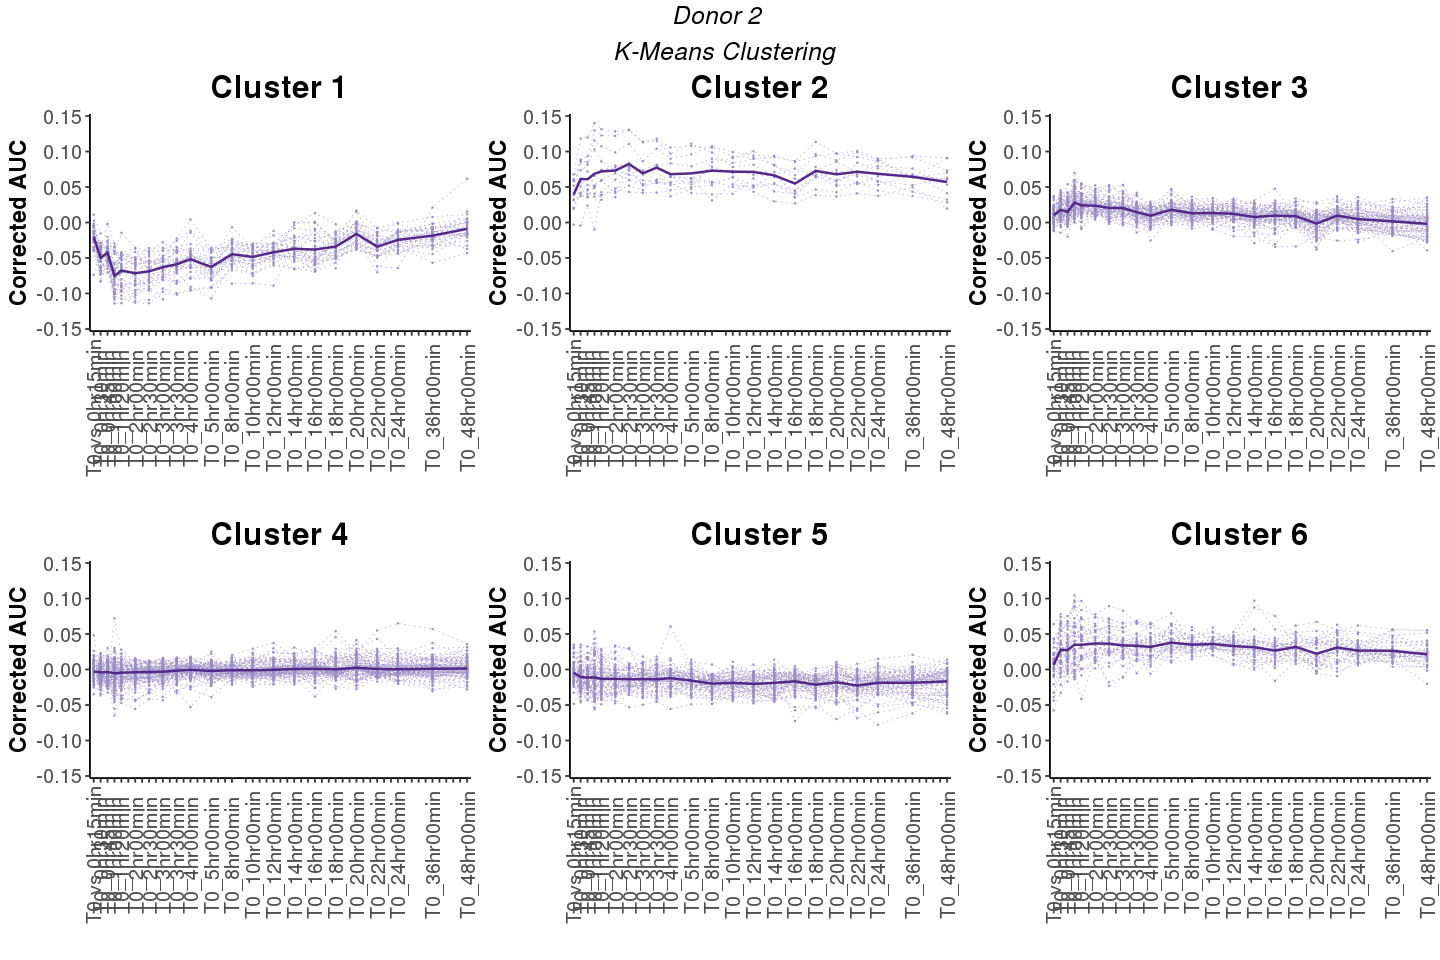

In [26]:
cluster_analysis(lps_auc_donor2, 
                 "Donor 2 \n K-Means Clustering",
                colname_days2,
                level_days2,
                plot_limits2,
                plot_labels2,
                "#542788","#998ec3")

In [27]:
subset(donor2_clusters, cluster == 2)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,00hr00mindonor2_02hr30mindonor2_TFEA.txt,00hr00mindonor2_03hr00mindonor2_TFEA.txt,00hr00mindonor2_03hr30mindonor2_TFEA.txt,00hr00mindonor2_04hrdonor2_TFEA.txt,⋯,00hr00mindonor2_12hrdonor2_TFEA.txt,00hr00mindonor2_14hrdonor2_TFEA.txt,00hr00mindonor2_16hrdonor2_TFEA.txt,00hr00mindonor2_18hrdonor2_TFEA.txt,00hr00mindonor2_20hrdonor2_TFEA.txt,00hr00mindonor2_22hrdonor2_TFEA.txt,00hr00mindonor2_24hrdonor2_TFEA.txt,00hr00mindonor2_36hrdonor2_TFEA.txt,00hr00mindonor2_48hrdonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ATF4_HUMAN.H11MO.0.A,0.032395685,0.057336569,0.04668916,0.048452481,0.03193954,0.03572138,0.07334905,0.05264703,0.05584088,0.05574952,⋯,0.06230608,0.04375928,0.04042453,0.06383576,0.07064373,0.05417202,0.06524024,0.06745901,0.04130020,2
CEBPB_HUMAN.H11MO.0.A,0.058817417,0.073863817,0.08140802,0.102970390,0.08605938,0.07261413,0.06739218,0.05946232,0.05833499,0.05271563,⋯,0.04336943,0.02979437,0.02694767,0.03839757,0.03672770,0.04107658,0.03721057,0.04947779,0.01981263,2
CEBPG_HUMAN.H11MO.0.B,0.020849106,0.050702515,0.03982679,0.040749747,0.03882310,0.04412712,0.07798472,0.05265838,0.05616553,0.05662171,⋯,0.04936807,0.05427650,0.04352445,0.07337930,0.08554444,0.07020106,0.07945786,0.07616166,0.05331577,2
GCR_HUMAN.H11MO.0.A,0.031334594,0.037416091,0.03618832,0.036638675,0.03825815,0.04792917,0.04301098,0.04196960,0.04223049,0.04538553,⋯,0.05202912,0.06616234,0.07619482,0.06602341,0.05143123,0.05516974,0.05285520,0.06745151,0.06079570,2
IRF9_HUMAN.H11MO.0.C,-0.002975733,-0.004280361,0.02371508,-0.009864029,0.04266234,0.06017370,0.07692185,0.06740739,0.08007515,0.08335778,⋯,0.08952031,0.09226494,0.08535133,0.09357099,0.09726239,0.09223998,0.08634282,0.06299219,0.07027591,2
NFKB1_HUMAN.H11MO.1.B,0.061159461,0.088671989,0.09345652,0.129731495,0.12272567,0.12192531,0.13047655,0.11393690,0.11477705,0.09713341,⋯,0.08146071,0.06398062,0.05502033,0.07846107,0.05340958,0.08416108,0.07629566,0.06625563,0.06106745,2
NFKB2_HUMAN.H11MO.0.B,0.038586329,0.040746627,0.03529134,0.051908978,0.05964663,0.06947733,0.05983661,0.05415639,0.06055565,0.06488809,⋯,0.05173535,0.05558538,0.03532454,0.04649215,0.04264594,0.05692188,0.04493438,0.03727327,0.02845942,2
REL_HUMAN.H11MO.0.B,0.019237731,0.041847712,0.04535540,0.065811864,0.07208126,0.07760946,0.08396920,0.07076868,0.07796918,0.06392845,⋯,0.06732753,0.06524874,0.04524095,0.06478213,0.05960884,0.06765613,0.05758235,0.04329482,0.03243520,2
RELB_HUMAN.H11MO.0.C,0.051863105,0.087515125,0.08487526,0.115658203,0.10738690,0.09877170,0.11075421,0.08641719,0.10401779,0.08991371,⋯,0.09429933,0.09399225,0.08655514,0.11357056,0.09750905,0.10068624,0.09014960,0.09191641,0.07329028,2


In [111]:
subset(donor2_clusters, cluster == 3)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,00hr00mindonor2_02hr30mindonor2_TFEA.txt,00hr00mindonor2_03hr00mindonor2_TFEA.txt,00hr00mindonor2_03hr30mindonor2_TFEA.txt,00hr00mindonor2_04hrdonor2_TFEA.txt,⋯,00hr00mindonor2_12hrdonor2_TFEA.txt,00hr00mindonor2_14hrdonor2_TFEA.txt,00hr00mindonor2_16hrdonor2_TFEA.txt,00hr00mindonor2_18hrdonor2_TFEA.txt,00hr00mindonor2_20hrdonor2_TFEA.txt,00hr00mindonor2_22hrdonor2_TFEA.txt,00hr00mindonor2_24hrdonor2_TFEA.txt,00hr00mindonor2_36hrdonor2_TFEA.txt,00hr00mindonor2_48hrdonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AIRE_HUMAN.H11MO.0.C,-0.0096080823,-0.014278448,-0.005183435,1.164742e-02,0.0103653999,0.020435080,0.0134321512,0.022070590,0.0245800802,4.249275e-03,⋯,0.002716541,0.0113810956,0.0074604221,-0.006730192,-1.443836e-02,-6.856304e-03,-0.0069322165,-0.0170155481,-0.021381344,3
ATF2_HUMAN.H11MO.0.B,0.0341140455,0.013698551,0.017204403,4.515954e-03,0.0412791296,0.022051705,0.0172992153,0.009380626,0.0140377477,4.707410e-03,⋯,0.003808383,0.0082298772,-0.0006421856,-0.002065548,1.206697e-02,1.002342e-02,-0.0024834613,0.0116974778,-0.018559849,3
BATF_HUMAN.H11MO.0.A,0.0222648809,0.032402162,0.029284752,4.960972e-02,0.0301004105,0.042085997,0.0468712447,0.042698718,0.0253840181,1.531206e-02,⋯,0.010975675,0.0126426932,0.0176248998,0.006050264,5.907587e-03,1.873646e-02,0.0357863921,0.0164778180,0.007750370,3
BATF3_HUMAN.H11MO.0.B,0.0373316422,0.038392796,0.041692492,3.849441e-02,0.0364244845,0.006183306,0.0310559923,0.021047426,0.0079728513,5.003859e-03,⋯,0.009462181,0.0075054031,-0.0019603132,-0.006704289,-7.985932e-03,1.483900e-02,0.0116282108,0.0189058974,0.030850271,3
BC11A_HUMAN.H11MO.0.A,-0.0022412856,0.011037195,0.009388350,1.100868e-02,0.0155403764,0.016143630,0.0152613402,0.013280780,0.0104964199,1.217384e-02,⋯,0.014133712,0.0057864112,0.0022622362,0.008598927,5.172832e-03,9.089344e-03,0.0055531342,0.0033860693,0.005130546,3
BCL6_HUMAN.H11MO.0.A,-0.0053538658,0.005019602,-0.005615368,9.296213e-06,-0.0071311108,0.008233471,0.0151956595,0.015496205,0.0176108451,2.152865e-02,⋯,0.031510065,0.0273261335,0.0237236820,0.033955772,2.616219e-02,2.877404e-02,0.0171187421,0.0099541895,0.008570179,3
BHA15_HUMAN.H11MO.0.B,0.0147022743,0.012051837,0.004428007,2.157283e-02,0.0122012622,0.014868824,0.0160112972,0.012413474,0.0087112010,5.436472e-05,⋯,0.015589962,0.0120086716,0.0093337760,0.004013041,-8.901246e-05,1.140435e-02,0.0047667493,0.0009364272,-0.004700035,3
CLOCK_HUMAN.H11MO.0.C,0.0181400925,-0.003709559,0.005603850,1.645009e-02,0.0286607522,0.008466764,0.0217808730,0.010188688,-0.0140267365,-5.525965e-03,⋯,-0.012220259,-0.0063874511,-0.0103110091,0.012137514,-3.838356e-02,2.164958e-02,-0.0049276893,0.0055733863,-0.002351625,3
DBP_HUMAN.H11MO.0.B,0.0035624866,0.019109123,0.037826713,2.832864e-02,0.0318823509,0.043056767,0.0288186384,0.012560807,0.0384781288,2.565024e-02,⋯,0.016989737,-0.0079369672,-0.0304778215,0.002525080,-2.587986e-02,5.540576e-03,-0.0152484408,0.0116924302,-0.002813641,3


In [110]:
subset(donor2_clusters, cluster == 6)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,00hr00mindonor2_02hr30mindonor2_TFEA.txt,00hr00mindonor2_03hr00mindonor2_TFEA.txt,00hr00mindonor2_03hr30mindonor2_TFEA.txt,00hr00mindonor2_04hrdonor2_TFEA.txt,⋯,00hr00mindonor2_12hrdonor2_TFEA.txt,00hr00mindonor2_14hrdonor2_TFEA.txt,00hr00mindonor2_16hrdonor2_TFEA.txt,00hr00mindonor2_18hrdonor2_TFEA.txt,00hr00mindonor2_20hrdonor2_TFEA.txt,00hr00mindonor2_22hrdonor2_TFEA.txt,00hr00mindonor2_24hrdonor2_TFEA.txt,00hr00mindonor2_36hrdonor2_TFEA.txt,00hr00mindonor2_48hrdonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AP2A_HUMAN.H11MO.0.A,0.003675599,0.035861575,0.0328152494,0.0618564054,0.0464903521,0.054311869,0.061518833,0.052600345,0.031548664,0.029365891,⋯,0.038266271,0.0298696348,0.008781665,0.022987870,-0.001950816,0.026741324,0.019898842,0.017489650,0.018747399,6
AP2C_HUMAN.H11MO.0.A,0.007271529,0.029763167,0.0101558014,0.0599157021,0.0560438222,0.052795173,0.057421420,0.053799723,0.037289928,0.035765047,⋯,0.037833914,0.0371153914,0.020765166,0.030963324,0.004644247,0.033385842,0.019206916,0.023007670,0.017574515,6
ARI5B_HUMAN.H11MO.0.C,-0.032790388,0.002336225,-0.0169239267,0.0077767096,0.0007580659,0.001580694,0.004179351,0.018324977,0.011577199,0.014660418,⋯,0.046319046,0.0404184968,0.037334375,0.034663092,0.019433019,0.048608759,0.030955091,0.026131248,0.020004324,6
BACH1_HUMAN.H11MO.0.A,0.043409566,0.063565591,0.0566284926,0.1043657357,0.0837199424,0.077727428,0.089294861,0.082881002,0.064820988,0.063363149,⋯,0.024468270,0.0026846760,0.013327398,0.030805768,0.005176512,0.010860115,0.025396092,0.018957432,0.017707148,6
BACH2_HUMAN.H11MO.0.A,0.037491118,0.060917176,0.0473855394,0.0896405940,0.0594416318,0.054764727,0.061171304,0.058711546,0.038278808,0.045453340,⋯,0.008588246,-0.0002783975,0.018855105,0.010818025,-0.005978383,-0.009245922,0.016392434,0.015505723,0.023954396,6
CEBPA_HUMAN.H11MO.0.A,0.064007215,0.074122563,0.0754829487,0.0873176387,0.0587764013,0.044817708,0.051645248,0.041100413,0.039697872,0.042864164,⋯,0.037113082,0.0255045612,0.037678314,0.034045106,0.030111921,0.030595056,0.020345384,0.027091146,0.015130512,6
CEBPD_HUMAN.H11MO.0.C,0.023260448,0.054748219,0.0680791792,0.0469948804,0.0447873497,0.061017204,0.039135654,0.035458573,0.033632654,0.028727705,⋯,0.036384039,0.0259174691,0.029926744,0.034434385,0.011800040,0.011166002,0.009752187,0.012708601,-0.020104448,6
COE1_HUMAN.H11MO.0.A,0.009602566,0.055999736,0.0432953080,0.0520753754,0.0412163289,0.045835333,0.053552996,0.036389919,0.035890560,0.042325182,⋯,0.042996848,0.0405244723,0.034588377,0.038212168,0.011956333,0.039248472,0.024473357,0.019379449,0.029218248,6
DLX3_HUMAN.H11MO.0.C,0.013093762,0.013021321,0.0254653711,-0.0136498393,0.0011196053,0.012855905,0.009193483,0.015294739,0.020837549,-0.006214853,⋯,0.043027269,0.0334860768,0.007459328,0.043776483,0.040718475,0.055639412,0.052425881,0.047940479,0.051660476,6


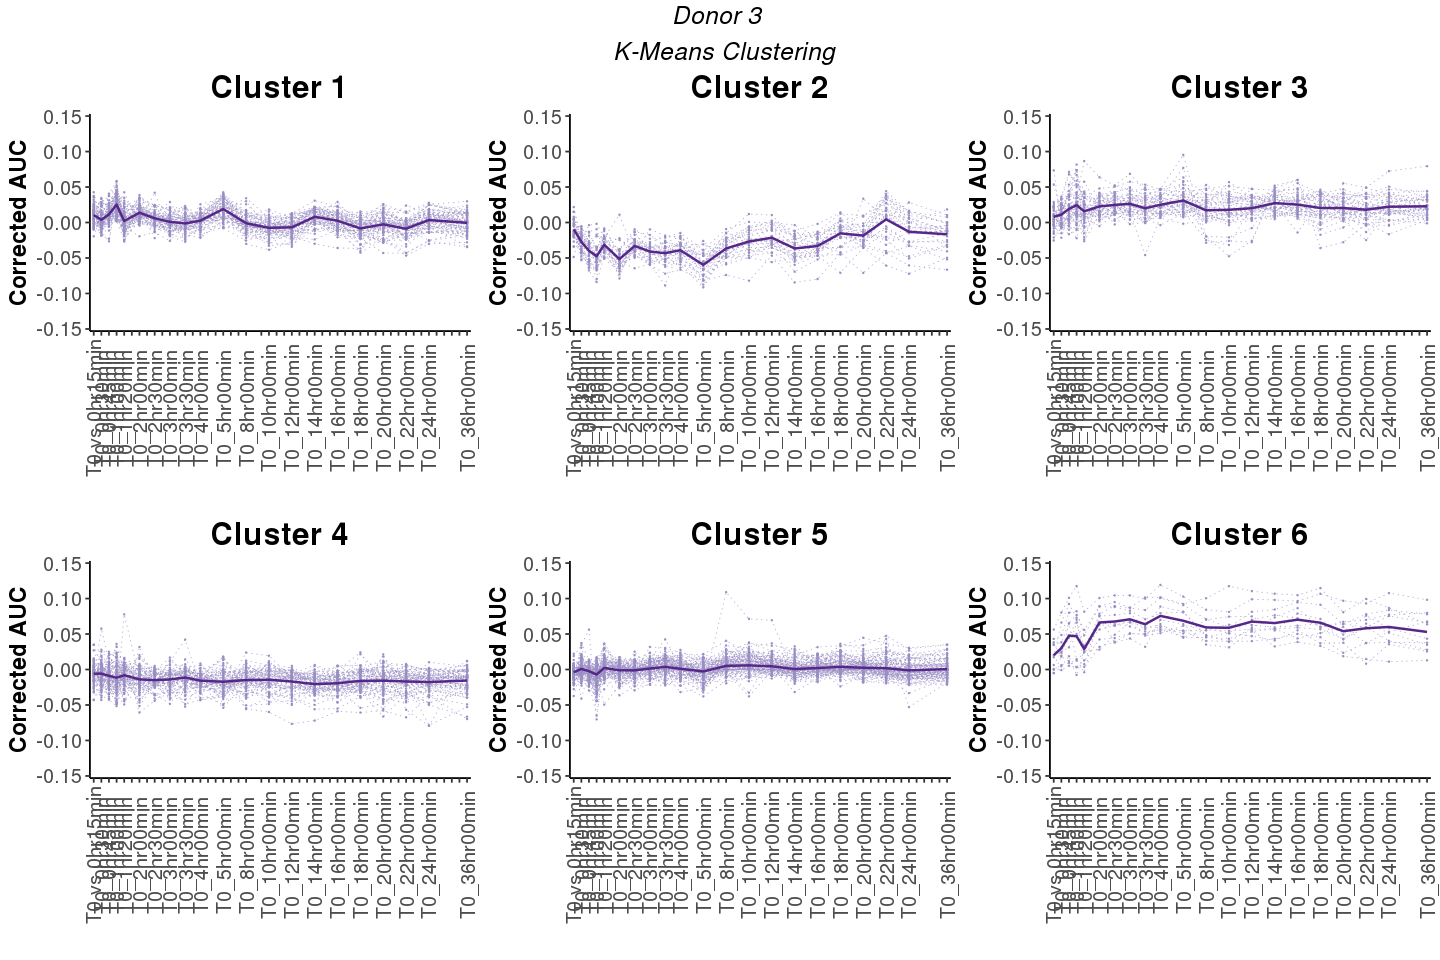

In [28]:
cluster_analysis(lps_auc_donor3, 
                 "Donor 3 \n K-Means Clustering",
                colname_days3,
                level_days3,
                plot_limits3,
                plot_labels3,
                "#542788","#998ec3")

In [29]:
subset(donor3_clusters, cluster == 6)

,00hr00mindonor3_00hr15mindonor3_TFEA.txt,00hr00mindonor3_00hr30mindonor3_TFEA.txt,00hr00mindonor3_00hr45mindonor3_TFEA.txt,00hr00mindonor3_01hr00mindonor3_TFEA.txt,00hr00mindonor3_01hr20mindonor3_TFEA.txt,00hr00mindonor3_02hr00mindonor3_TFEA.txt,00hr00mindonor3_02hr30mindonor3_TFEA.txt,00hr00mindonor3_03hr00mindonor3_TFEA.txt,00hr00mindonor3_03hr30mindonor3_TFEA.txt,00hr00mindonor3_04hrdonor3_TFEA.txt,⋯,00hr00mindonor3_10hrdonor3_TFEA.txt,00hr00mindonor3_12hrdonor3_TFEA.txt,00hr00mindonor3_14hrdonor3_TFEA.txt,00hr00mindonor3_16hrdonor3_TFEA.txt,00hr00mindonor3_18hrdonor3_TFEA.txt,00hr00mindonor3_20hrdonor3_TFEA.txt,00hr00mindonor3_22hrdonor3_TFEA.txt,00hr00mindonor3_24hrdonor3_TFEA.txt,00hr00mindonor3_36hrdonor3_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
FOSL2_HUMAN.H11MO.0.A,0.0172717286,0.0662276666,0.092350646,0.072943375,0.031672586,0.05638447,0.06167248,0.06948415,0.05691657,0.06403226,⋯,0.04325567,0.05512964,0.03257123,0.03880196,0.03326765,0.01868672,0.014739244,0.01103472,0.01291398,6
GLI3_HUMAN.H11MO.0.B,0.0061979657,0.0251125594,0.031200086,0.066147627,0.024529092,0.06284895,0.06184708,0.06686266,0.04771971,0.05119803,⋯,0.05077598,0.04710284,0.04098198,0.05520781,0.03701782,0.03759488,0.008183966,0.03553054,0.02547739,6
IRF2_HUMAN.H11MO.0.A,0.0006264836,-0.0008108599,0.005266118,0.003301579,0.012750262,0.04232349,0.04427913,0.05098796,0.04928178,0.06114984,⋯,0.06305016,0.06267427,0.05935991,0.06188759,0.06461201,0.04245090,0.064689926,0.05175998,0.03487180,6
IRF7_HUMAN.H11MO.0.C,-0.0051379248,0.0045838518,0.018745898,-0.007610639,0.026196826,0.02800144,0.04883625,0.06637830,0.06100745,0.05874760,⋯,0.07441625,0.07486709,0.05497697,0.07891613,0.07121375,0.04922203,0.075788134,0.05848394,0.04336383,6
IRF9_HUMAN.H11MO.0.C,-0.0003472810,0.0061489759,0.009271399,0.012568993,0.024322275,0.07852318,0.08945288,0.08718118,0.10150004,0.10177996,⋯,0.11746722,0.11041849,0.10680705,0.10473823,0.11473408,0.08073994,0.099471794,0.08676092,0.06363057,6
NFKB1_HUMAN.H11MO.1.B,0.0346205378,0.0383564182,0.065330083,0.076792486,0.055704882,0.08872917,0.08806916,0.08287709,0.07094343,0.07940215,⋯,0.03890216,0.05927980,0.07328357,0.08646708,0.05896960,0.06718188,0.069911936,0.07721963,0.07980723,6
NFKB2_HUMAN.H11MO.0.B,0.0431548072,0.0303602520,0.047953031,0.050035361,0.034303759,0.06548132,0.06392574,0.06067191,0.05358432,0.05445634,⋯,0.03961805,0.04002308,0.04327523,0.05020143,0.04558374,0.02350729,0.037290655,0.03825869,0.03775015,6
PRDM1_HUMAN.H11MO.0.A,-0.0050103178,0.0180946192,0.011708609,0.003504556,0.003712874,0.03188208,0.03907572,0.05045626,0.05014487,0.05675930,⋯,0.05442233,0.05698250,0.05718712,0.05906597,0.05666665,0.04313688,0.059708889,0.04040575,0.02781820,6
REL_HUMAN.H11MO.0.B,0.0200572035,0.0235645729,0.044848507,0.070387460,0.007471011,0.07513545,0.07695210,0.07929331,0.05919478,0.08871255,⋯,0.05155092,0.06997981,0.07659547,0.07222638,0.06051413,0.06454529,0.059106941,0.07539617,0.06622737,6


# Analyzing filtered TFEA results

In this section the data was filtered first by p-value, then followed looking only at the first 5 hours of the time series. This is an attempt to concentrate at the early time-points of the time-series as a way to separate early vs late immune response.

In [30]:
##subset datasets by donors
lps_pval_donor1 <- tfea_pvl_df[,colnames(tfea_pvl_df) %in% grep("donor1", colnames(tfea_pvl_df),perl=TRUE, value=TRUE)]
lps_pval_donor2 <- tfea_pvl_df[,colnames(tfea_pvl_df) %in% grep("donor2", colnames(tfea_pvl_df),perl=TRUE, value=TRUE)]
lps_pval_donor3 <- tfea_pvl_df[,colnames(tfea_pvl_df) %in% grep("donor3", colnames(tfea_pvl_df),perl=TRUE, value=TRUE)]

#assign rownames at TFs
rownames(lps_pval_donor1) <- as.character(tfea_pvl_df[,c(1)])
rownames(lps_pval_donor2) <- as.character(tfea_pvl_df[,c(1)])
rownames(lps_pval_donor3) <- as.character(tfea_pvl_df[,c(1)])

Further analyses were done on donor2 and donor3 since donor1 had close to half the time points.

## Donor 2


- Transcription factors with at least a single time-point with p-value <= 1e-07 were filtered for the cluster analysis
- The first eleven time points were analyzed

In [31]:
##filter rows with p-value that is not equal to 1
donor2_sig <- apply(lps_pval_donor2, 1, function(row) any(row <= 0.0000001 ))
                           
##Subset the TFs with at least on significant time point
lps_pval_donor2_sig <- lps_pval_donor2[donor2_sig,]
dim(lps_pval_donor2_sig)

[1] 78 22

In [32]:
lps_auc_donor2_short <- lps_auc_donor2[rownames(lps_auc_donor2) %in% rownames(lps_pval_donor2_sig) , 1:11]

In [33]:
head(lps_auc_donor2_short,3)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,00hr00mindonor2_02hr30mindonor2_TFEA.txt,00hr00mindonor2_03hr00mindonor2_TFEA.txt,00hr00mindonor2_03hr30mindonor2_TFEA.txt,00hr00mindonor2_04hrdonor2_TFEA.txt,00hr00mindonor2_05hrdonor2_TFEA.txt
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AP2C_HUMAN.H11MO.0.A,0.007271529,0.02976317,0.01015580,0.05991570,0.05604382,0.05279517,0.05742142,0.05379972,0.03728993,0.03576505,0.04341494
BACH1_HUMAN.H11MO.0.A,0.043409566,0.06356559,0.05662849,0.10436574,0.08371994,0.07772743,0.08929486,0.08288100,0.06482099,0.06336315,0.07914548
BACH2_HUMAN.H11MO.0.A,0.037491118,0.06091718,0.04738554,0.08964059,0.05944163,0.05476473,0.06117130,0.05871155,0.03827881,0.04545334,0.05532918


In [34]:
donor2short <- fviz_nbclust(lps_auc_donor2_short, 
                      kmeans, 
                      method = "wss",
                      k.max = 15, nboot = 50,
                      verbose = TRUE)

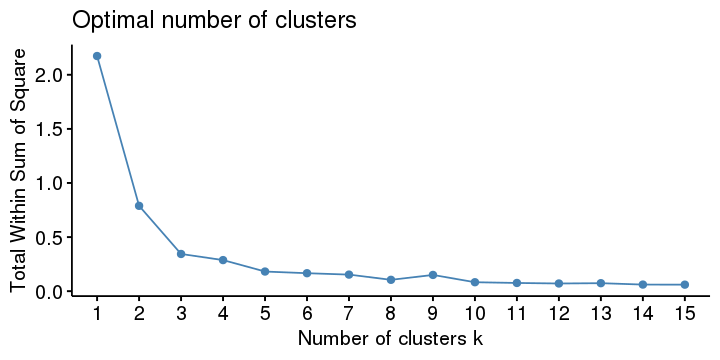

In [35]:
options(repr.plot.width=6, repr.plot.height=3)

donor2short

Based on the Total Within SUm of Squares, 3 clusters will capture the overall trajectories/trends in TF activity over time. 

In [36]:
##create brakes for donor2
colname_days2short <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                   "T0_1hr20min","T0_2hr00min","T0_2hr30min","T0_3hr00min",
                   "T0_3hr30min","T0_4hr00min","T0_5hr00min","TF")

level_days2short <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","T0_2hr00min","T0_2hr30min","T0_3hr00min",
                 "T0_3hr30min","T0_4hr00min","T0_5hr00min")

plot_limits2short <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","z1","T0_2hr00min","z2","T0_2hr30min","z3","T0_3hr00min",
                 "z4","T0_3hr30min","z5","T0_4hr00min","zz1","zz2","T0_5hr00min")


plot_labels2short <- c("T0 vs 0hr15min","T0 vs 0hr30min","T0 vs 0hr45min","T0 vs 1hr00min",
                 "T0 vs 1hr20min"," ","T0 vs 2hr00min"," ","T0 vs 2hr30min"," ","T0 vs 3hr00min",
                 " ","T0 vs 3hr30min"," ","T0 vs 4hr00min"," "," ","T0 vs 5hr00min")

In [37]:
lps_auc_donor2_shortgather <- restructure_df(df = lps_auc_donor2_short, 
                                             cols = level_days2short, 
                                             levels =  level_days2short)

In [38]:
lps_auc_donor2_short_cluster <- clustering_by_auc(lps_auc_donor2_short,clusters = 3)

In [39]:
plotting_clusters_short <- function(cluster_df_list, main_main, 
                              cols, levels, breaks, labels,
                              colour_main, colour_minor){
    
    control_df <- cluster_df_list

    ##control
    c.c1 <- subset(control_df, cluster == 1 )
    c.c2 <- subset(control_df, cluster == 2 )
    c.c3 <- subset(control_df, cluster == 3 )

    
    ##line plot for all
    options(repr.plot.width=12, repr.plot.height=5)

    grid.arrange(plot_tfea_auc(c.c1, "Cluster 1", cols, levels, 
                               breaks, labels, colour_main, colour_minor), 
                 plot_tfea_auc(c.c2, "Cluster 2", cols, levels, 
                               breaks, labels, colour_main, colour_minor), 
                 plot_tfea_auc(c.c3, "Cluster 3", cols, levels,
                               breaks, labels, colour_main, colour_minor),
                 top = textGrob(main_main,
                                gp=gpar(fontsize=15,font=3)),
                 nrow = 1)
}

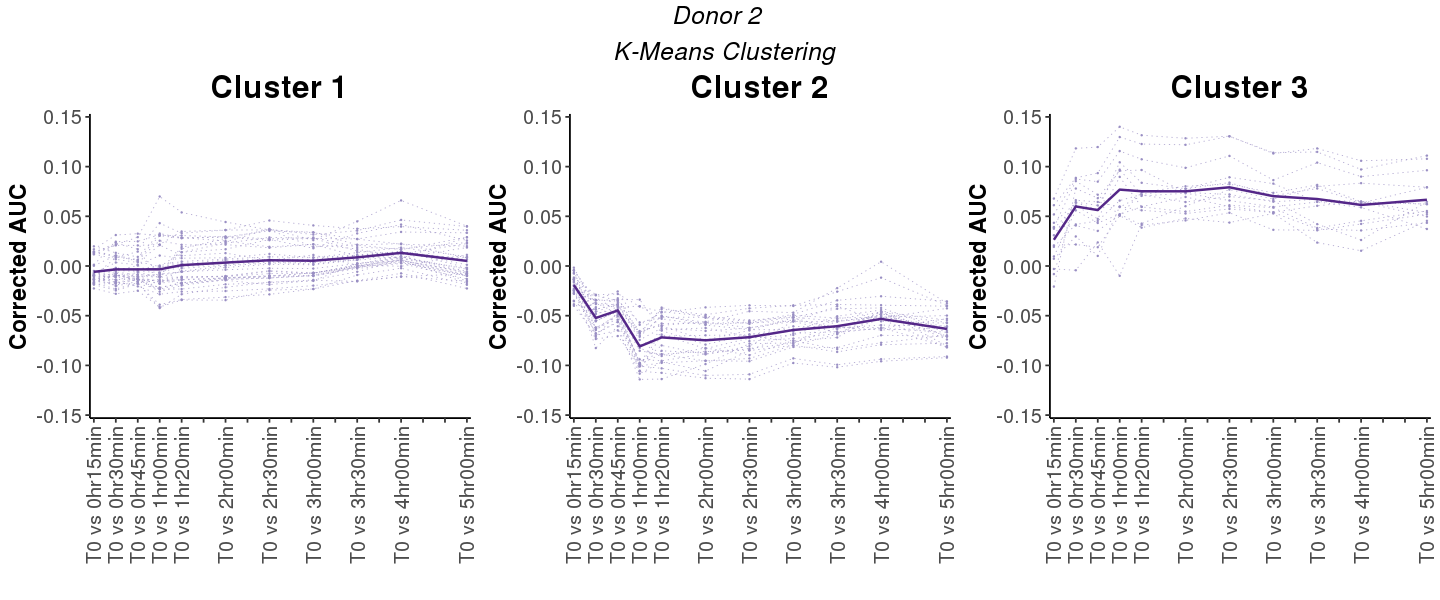

In [40]:
plotting_clusters_short(lps_auc_donor2_short_cluster,
                        "Donor 2 \n K-Means Clustering",
                       colname_days2short,
                        level_days2short,
                        plot_limits2short,
                        plot_labels2short,
                        "#542788","#998ec3")

In [41]:
subset(lps_auc_donor2_short_cluster, cluster == 1)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,00hr00mindonor2_02hr30mindonor2_TFEA.txt,00hr00mindonor2_03hr00mindonor2_TFEA.txt,00hr00mindonor2_03hr30mindonor2_TFEA.txt,00hr00mindonor2_04hrdonor2_TFEA.txt,00hr00mindonor2_05hrdonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
E2F6_HUMAN.H11MO.0.A,-0.022557397,-0.027950781,-0.0248701828,-0.0412717909,-0.0342274310,-0.0343359921,-0.024221658,-0.023173380,-9.042208e-03,-0.0021939290,-0.018932806,1
E2F7_HUMAN.H11MO.0.B,-0.017049177,-0.023043495,-0.0172151799,-0.0422907728,-0.0283888719,-0.0214391863,-0.016152629,-0.014989361,2.717793e-03,0.0055782694,-0.017103380,1
EGR1_HUMAN.H11MO.0.A,-0.018370208,-0.017662257,-0.0178276064,-0.0232293115,-0.0231727457,-0.0184180331,-0.016700053,-0.013930036,-5.809469e-03,0.0063624083,-0.015032553,1
EGR2_HUMAN.H11MO.0.A,-0.013530280,-0.009580646,-0.0127815715,-0.0148170590,-0.0136250061,-0.0118556433,-0.011358347,-0.009134886,-7.877492e-04,0.0078187594,-0.007580727,1
IRF1_HUMAN.H11MO.0.A,-0.010536125,-0.011426465,-0.0133314517,-0.0179862051,-0.0023299192,0.0008979520,0.003985972,0.001939446,6.947502e-03,0.0116594516,0.008430692,1
IRF2_HUMAN.H11MO.0.A,-0.006963933,-0.004391449,0.0004830766,-0.0100428143,0.0172678838,0.0278554698,0.036838922,0.031605294,3.555542e-02,0.0463449979,0.039684470,1
IRF4_HUMAN.H11MO.0.A,0.016782619,0.031158176,0.0325534849,0.0306829876,0.0306552537,0.0292991752,0.035284956,0.033697733,2.709288e-02,0.0219404297,0.019986325,1
IRF7_HUMAN.H11MO.0.C,-0.009995083,0.008371411,0.0145048183,-0.0073373872,0.0191547939,0.0242071663,0.037374527,0.026005160,4.489625e-02,0.0659743001,0.040089729,1
IRF8_HUMAN.H11MO.0.B,0.014375540,0.020780711,0.0207324737,0.0216629028,0.0347734579,0.0361747422,0.045787913,0.040832765,3.746968e-02,0.0396165637,0.035988862,1


In [42]:
subset(lps_auc_donor2_short_cluster, cluster == 2)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,00hr00mindonor2_02hr30mindonor2_TFEA.txt,00hr00mindonor2_03hr00mindonor2_TFEA.txt,00hr00mindonor2_03hr30mindonor2_TFEA.txt,00hr00mindonor2_04hrdonor2_TFEA.txt,00hr00mindonor2_05hrdonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ELF1_HUMAN.H11MO.0.A,-0.019363314,-0.04840027,-0.04123573,-0.09916906,-0.06055765,-0.07442109,-0.06486545,-0.05218080,-0.06356914,-0.045916216,-0.05447968,2
ELF2_HUMAN.H11MO.0.C,-0.012753857,-0.07133336,-0.04651859,-0.09749339,-0.07992313,-0.08888894,-0.08058797,-0.05552968,-0.06698418,-0.062534976,-0.05301876,2
ELK1_HUMAN.H11MO.0.B,-0.024128946,-0.06167730,-0.05402199,-0.09392314,-0.09538653,-0.08843288,-0.08300476,-0.07764763,-0.05502151,-0.051037614,-0.06095809,2
ELK4_HUMAN.H11MO.0.A,-0.035001469,-0.07344046,-0.07045655,-0.10050928,-0.09748359,-0.09523994,-0.09579218,-0.08142554,-0.08218827,-0.069680921,-0.07071552,2
ETV1_HUMAN.H11MO.0.A,-0.022761056,-0.05539511,-0.04478203,-0.08259388,-0.09055002,-0.08248979,-0.08968197,-0.07497727,-0.08366463,-0.077228715,-0.06966257,2
FOXI1_HUMAN.H11MO.0.B,-0.013693805,-0.04795327,-0.04338124,-0.06706815,-0.05782524,-0.05736203,-0.05701441,-0.05559303,-0.04039413,-0.055679248,-0.05752175,2
FOXJ3_HUMAN.H11MO.0.A,-0.024571109,-0.02948207,-0.03470106,-0.05675271,-0.05152598,-0.05158978,-0.05578662,-0.04862866,-0.03454612,-0.030440038,-0.03554317,2
GABPA_HUMAN.H11MO.0.A,-0.026977993,-0.06396751,-0.04803555,-0.09857084,-0.08865241,-0.08605849,-0.08452842,-0.06776372,-0.06604420,-0.062615236,-0.06669367,2
KAISO_HUMAN.H11MO.0.A,-0.016436613,-0.08255128,-0.06058846,-0.11406393,-0.11375996,-0.09866280,-0.07809940,-0.07734148,-0.06195738,-0.061850087,-0.08142829,2


In [43]:
subset(lps_auc_donor2_short_cluster, cluster == 3)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,00hr00mindonor2_02hr30mindonor2_TFEA.txt,00hr00mindonor2_03hr00mindonor2_TFEA.txt,00hr00mindonor2_03hr30mindonor2_TFEA.txt,00hr00mindonor2_04hrdonor2_TFEA.txt,00hr00mindonor2_05hrdonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AP2C_HUMAN.H11MO.0.A,0.007271529,0.029763167,0.01015580,0.059915702,0.05604382,0.05279517,0.05742142,0.05379972,0.03728993,0.03576505,0.04341494,3
BACH1_HUMAN.H11MO.0.A,0.043409566,0.063565591,0.05662849,0.104365736,0.08371994,0.07772743,0.08929486,0.08288100,0.06482099,0.06336315,0.07914548,3
BACH2_HUMAN.H11MO.0.A,0.037491118,0.060917176,0.04738554,0.089640594,0.05944163,0.05476473,0.06117130,0.05871155,0.03827881,0.04545334,0.05532918,3
COE1_HUMAN.H11MO.0.A,0.009602566,0.055999736,0.04329531,0.052075375,0.04121633,0.04583533,0.05355300,0.03638992,0.03589056,0.04232518,0.05211951,3
FOSL1_HUMAN.H11MO.0.A,-0.008138907,0.066245594,0.06444503,0.059287350,0.07051734,0.07317491,0.06590755,0.05937258,0.06445902,0.05900536,0.03723537,3
FOSL2_HUMAN.H11MO.0.A,-0.020731452,0.077945179,0.06825224,0.095785259,0.09658790,0.07396064,0.07202663,0.06465635,0.06714019,0.06444932,0.04978226,3
IRF9_HUMAN.H11MO.0.C,-0.002975733,-0.004280361,0.02371508,-0.009864029,0.04266234,0.06017370,0.07692185,0.06740739,0.08007515,0.08335778,0.07923142,3
NFE2_HUMAN.H11MO.0.A,0.030922701,0.064252410,0.06095193,0.096961443,0.07166751,0.06434312,0.06988689,0.06571211,0.04212340,0.02614270,0.06455071,3
NFKB1_HUMAN.H11MO.1.B,0.061159461,0.088671989,0.09345652,0.129731495,0.12272567,0.12192531,0.13047655,0.11393690,0.11477705,0.09713341,0.11106156,3


## Donor 3

In [44]:
##filter rows with p-value that is not equal to 1
donor3_sig <- apply(lps_pval_donor3, 1, function(row) any(row <= 0.0000001 ))
                           
##Subset the TFs with at least on significant time point
lps_pval_donor3_sig <- lps_pval_donor3[donor3_sig,]


In [45]:
lps_auc_donor3_short <- lps_auc_donor3[rownames(lps_auc_donor3) %in% rownames(lps_pval_donor3_sig) , 1:11]


In [46]:
donor3short <- fviz_nbclust(lps_auc_donor3_short, 
                      kmeans, 
                      method = "wss",
                      k.max = 15, nboot = 50,
                      verbose = TRUE)

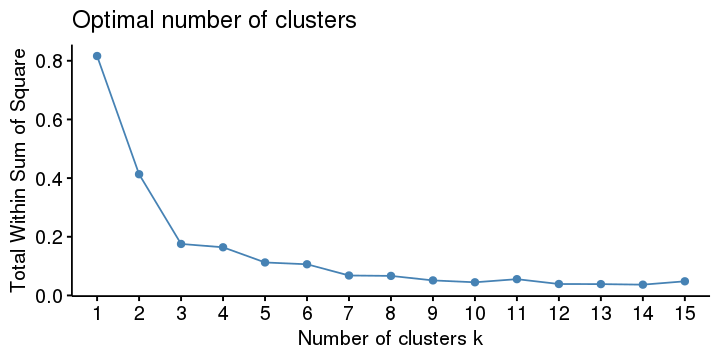

In [47]:
options(repr.plot.width=6, repr.plot.height=3)

donor3short

In [48]:
lps_auc_donor3_short_cluster <- clustering_by_auc(lps_auc_donor3_short,clusters = 3)

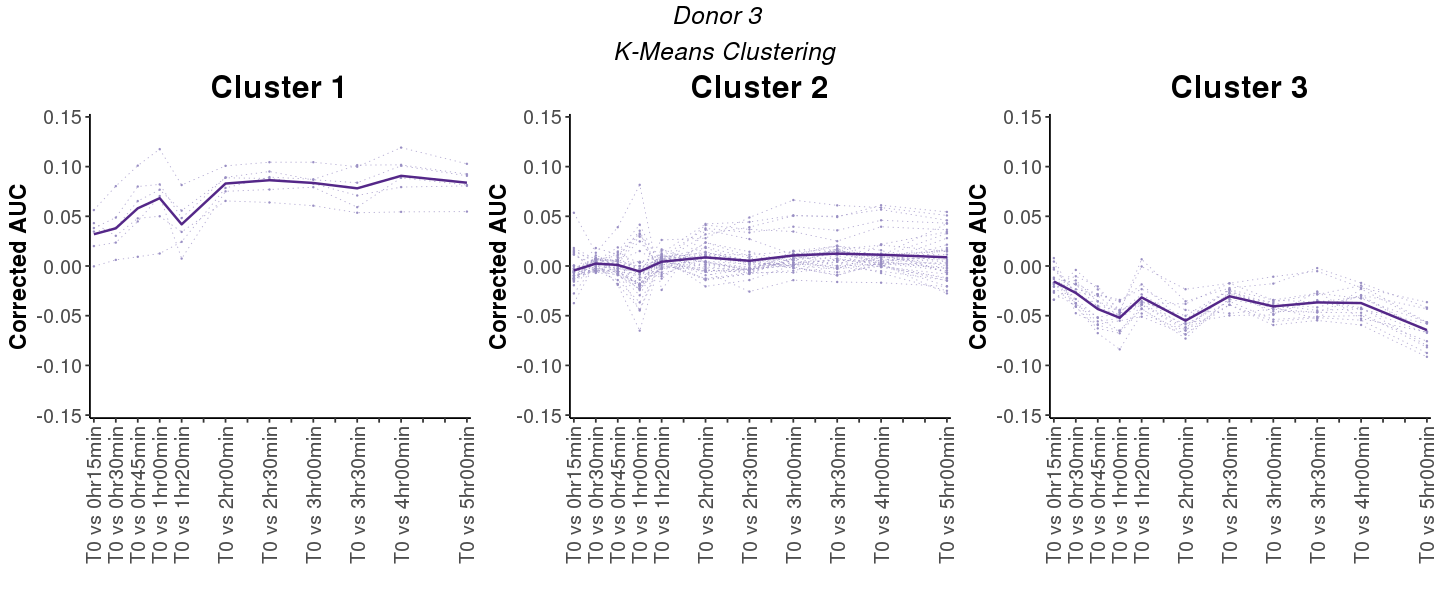

In [49]:
plotting_clusters_short(lps_auc_donor3_short_cluster,
                        "Donor 3 \n K-Means Clustering",
                       colname_days2short,
                        level_days2short,
                        plot_limits2short,
                        plot_labels2short,
                        "#542788","#998ec3")

In [50]:
subset(lps_auc_donor3_short_cluster, cluster == 1)

,00hr00mindonor3_00hr15mindonor3_TFEA.txt,00hr00mindonor3_00hr30mindonor3_TFEA.txt,00hr00mindonor3_00hr45mindonor3_TFEA.txt,00hr00mindonor3_01hr00mindonor3_TFEA.txt,00hr00mindonor3_01hr20mindonor3_TFEA.txt,00hr00mindonor3_02hr00mindonor3_TFEA.txt,00hr00mindonor3_02hr30mindonor3_TFEA.txt,00hr00mindonor3_03hr00mindonor3_TFEA.txt,00hr00mindonor3_03hr30mindonor3_TFEA.txt,00hr00mindonor3_04hrdonor3_TFEA.txt,00hr00mindonor3_05hrdonor3_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
IRF9_HUMAN.H11MO.0.C,-0.000347281,0.006148976,0.009271399,0.01256899,0.024322275,0.07852318,0.08945288,0.08718118,0.10150004,0.10177996,0.09238468,1
NFKB1_HUMAN.H11MO.1.B,0.034620538,0.038356418,0.065330083,0.07679249,0.055704882,0.08872917,0.08806916,0.08287709,0.07094343,0.07940215,0.08062465,1
NFKB2_HUMAN.H11MO.0.B,0.043154807,0.030360252,0.047953031,0.05003536,0.034303759,0.06548132,0.06392574,0.06067191,0.05358432,0.05445634,0.05475496,1
REL_HUMAN.H11MO.0.B,0.020057203,0.023564573,0.044848507,0.07038746,0.007471011,0.07513545,0.07695210,0.07929331,0.05919478,0.08871255,0.08149892,1
RELB_HUMAN.H11MO.0.C,0.038181135,0.048740050,0.079958840,0.08209809,0.048214842,0.08919924,0.09504215,0.08676427,0.08379333,0.10081356,0.09072935,1
TF65_HUMAN.H11MO.0.A,0.056263563,0.080340063,0.100962731,0.11758919,0.081473789,0.10076841,0.10444329,0.10443126,0.09984719,0.11914273,0.10280070,1


In [51]:
subset(lps_auc_donor3_short_cluster, cluster == 2)

,00hr00mindonor3_00hr15mindonor3_TFEA.txt,00hr00mindonor3_00hr30mindonor3_TFEA.txt,00hr00mindonor3_00hr45mindonor3_TFEA.txt,00hr00mindonor3_01hr00mindonor3_TFEA.txt,00hr00mindonor3_01hr20mindonor3_TFEA.txt,00hr00mindonor3_02hr00mindonor3_TFEA.txt,00hr00mindonor3_02hr30mindonor3_TFEA.txt,00hr00mindonor3_03hr00mindonor3_TFEA.txt,00hr00mindonor3_03hr30mindonor3_TFEA.txt,00hr00mindonor3_04hrdonor3_TFEA.txt,00hr00mindonor3_05hrdonor3_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
E2F1_HUMAN.H11MO.0.A,-1.937441e-02,1.720584e-03,-0.0055494208,-4.476937e-02,4.672450e-03,-0.0043681259,-0.006061679,0.0152667617,0.0199977663,1.587242e-02,-0.0067610495,2
E2F6_HUMAN.H11MO.0.A,-2.762702e-02,2.135479e-03,-0.0181016231,-4.379434e-02,6.230485e-03,-0.0133103117,-0.008000274,0.0083558749,0.0075992405,1.245418e-03,-0.0203099368,2
EGR1_HUMAN.H11MO.0.A,-1.332631e-02,4.869576e-03,-0.0076595164,-2.942986e-02,1.147181e-02,-0.0036107391,-0.006888808,0.0070932852,0.0157337262,8.957800e-04,-0.0149051164,2
EGR2_HUMAN.H11MO.0.A,-1.243316e-02,6.817397e-03,0.0011706479,-1.847168e-02,1.140377e-02,0.0036858308,-0.004480816,0.0071525148,0.0167658830,4.380026e-03,-0.0026161098,2
ELF5_HUMAN.H11MO.0.A,-4.715970e-03,7.880249e-03,-0.0037866596,-2.434609e-02,7.402085e-03,-0.0092597062,-0.002763956,0.0123585341,0.0127227933,1.258332e-02,-0.0065559494,2
IRF1_HUMAN.H11MO.0.A,-5.920708e-03,-4.794394e-03,-0.0053674434,-8.560391e-03,5.409999e-03,0.0111097889,0.011564440,0.0144466496,0.0165904731,2.110512e-02,0.0148419740,2
IRF2_HUMAN.H11MO.0.A,6.264836e-04,-8.108599e-04,0.0052661183,3.301579e-03,1.275026e-02,0.0423234879,0.044279135,0.0509879582,0.0492817835,6.114984e-02,0.0543955109,2
IRF3_HUMAN.H11MO.0.B,-2.376257e-03,-2.418234e-03,0.0014221514,-5.112861e-05,1.164549e-03,0.0049648776,0.001646707,0.0028583298,0.0057350544,5.539132e-03,0.0087562422,2
IRF7_HUMAN.H11MO.0.C,-5.137925e-03,4.583852e-03,0.0187458983,-7.610639e-03,2.619683e-02,0.0280014362,0.048836251,0.0663783036,0.0610074452,5.874760e-02,0.0508684095,2


In [52]:
subset(lps_auc_donor3_short_cluster, cluster == 3)

,00hr00mindonor3_00hr15mindonor3_TFEA.txt,00hr00mindonor3_00hr30mindonor3_TFEA.txt,00hr00mindonor3_00hr45mindonor3_TFEA.txt,00hr00mindonor3_01hr00mindonor3_TFEA.txt,00hr00mindonor3_01hr20mindonor3_TFEA.txt,00hr00mindonor3_02hr00mindonor3_TFEA.txt,00hr00mindonor3_02hr30mindonor3_TFEA.txt,00hr00mindonor3_03hr00mindonor3_TFEA.txt,00hr00mindonor3_03hr30mindonor3_TFEA.txt,00hr00mindonor3_04hrdonor3_TFEA.txt,00hr00mindonor3_05hrdonor3_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ELF1_HUMAN.H11MO.0.A,-0.016755232,-0.033272813,-0.05222788,-0.06503152,-0.0427398180,-0.07300891,-0.03236184,-0.03615498,-0.028715055,-0.01968180,-0.05661032,3
ELF2_HUMAN.H11MO.0.C,0.004519358,-0.047483289,-0.05868635,-0.05505276,-0.0510376807,-0.06897384,-0.03357846,-0.04131905,-0.053210390,-0.02306106,-0.05715585,3
FOXI1_HUMAN.H11MO.0.B,-0.018056159,-0.014479933,-0.03550880,-0.05053512,-0.0321238055,-0.06158553,-0.02776408,-0.03925651,-0.044646534,-0.04315669,-0.06730221,3
FOXJ3_HUMAN.H11MO.0.A,-0.018249742,-0.010289576,-0.02059686,-0.04628131,0.0067585188,-0.03549876,-0.02222250,-0.01771295,-0.002119171,-0.01704002,-0.04171630,3
GABPA_HUMAN.H11MO.0.A,0.007993663,-0.037353675,-0.05163763,-0.04749631,-0.0387239956,-0.06233582,-0.02734872,-0.04539625,-0.046588130,-0.02923915,-0.04304198,3
NFYA_HUMAN.H11MO.0.A,-0.020364780,-0.018418313,-0.04151932,-0.04943873,-0.0361847123,-0.05008001,-0.02359322,-0.03430004,-0.036281457,-0.03114805,-0.06586946,3
NFYB_HUMAN.H11MO.0.A,-0.003515868,-0.026306000,-0.03004584,-0.04670399,-0.0285708737,-0.05476082,-0.02359142,-0.04343595,-0.046546218,-0.04706702,-0.08175875,3
NFYC_HUMAN.H11MO.0.A,-0.011680450,-0.018349979,-0.03557592,-0.04462974,-0.0352836255,-0.05339203,-0.02422508,-0.04801886,-0.034353176,-0.04198321,-0.08003216,3
NRF1_HUMAN.H11MO.0.A,-0.001846038,-0.026544552,-0.04004650,-0.04457726,-0.0369824232,-0.03814034,-0.01738777,-0.03420636,-0.027421936,-0.03268746,-0.05657160,3


# An Even Shorter Time Series 

## Looking at the first 5 time points (until 3 hours 00 minutes)

In [53]:
##filter rows with p-value that is not equal to 1
#donor2_sig2 <- apply(lps_pval_donor2[c(1:8)], 1, function(row) any(row <= 0.0000001 ))


In [54]:
##Subset the TFs with at least on significant time point
#lps_pval_donor2_sig_short <- lps_pval_donor2[donor2_sig,]
#dim(lps_pval_donor2_sig_short)

In [55]:
lps_auc_donor2_short2 <- lps_auc_donor2[rownames(lps_auc_donor2) %in% rownames(lps_pval_donor2_sig) , 1:6]

In [56]:
head(lps_auc_donor2_short2)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AP2C_HUMAN.H11MO.0.A,0.007271529,0.02976317,0.01015580,0.05991570,0.05604382,0.05279517
BACH1_HUMAN.H11MO.0.A,0.043409566,0.06356559,0.05662849,0.10436574,0.08371994,0.07772743
BACH2_HUMAN.H11MO.0.A,0.037491118,0.06091718,0.04738554,0.08964059,0.05944163,0.05476473
COE1_HUMAN.H11MO.0.A,0.009602566,0.05599974,0.04329531,0.05207538,0.04121633,0.04583533
E2F6_HUMAN.H11MO.0.A,-0.022557397,-0.02795078,-0.02487018,-0.04127179,-0.03422743,-0.03433599
E2F7_HUMAN.H11MO.0.B,-0.017049177,-0.02304350,-0.01721518,-0.04229077,-0.02838887,-0.02143919


In [57]:
donor2short2 <- fviz_nbclust(lps_auc_donor2_short2, 
                      kmeans, 
                      method = "wss",
                      k.max = 15, nboot = 50,
                      verbose = TRUE)

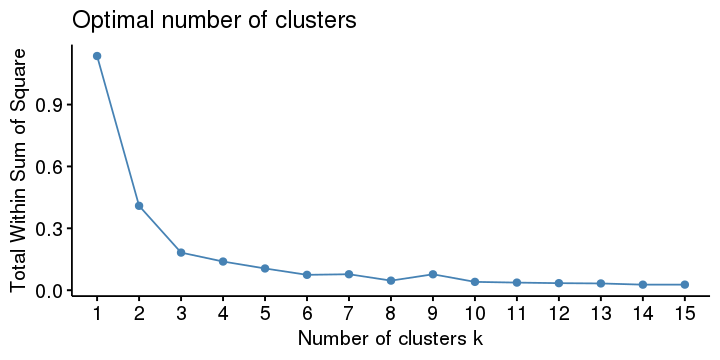

In [58]:
options(repr.plot.width=6, repr.plot.height=3)

donor2short2

In [59]:
##create brakes for donor2
colname_days2short2 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                   "T0_1hr20min","T0_2hr00min",
                         "TF")

level_days2short2 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","T0_2hr00min")

plot_limits2short2 <- c("T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                 "T0_1hr20min","T0_2hr00min")


plot_labels2short2 <- c("T0 vs 0hr15min","T0 vs 0hr30min","T0 vs 0hr45min","T0 vs 1hr00min",
                 "T0 vs 1hr20min", "T0 vs 2hr00min") 

In [60]:
lps_auc_donor2_short_cluster2 <- clustering_by_auc(lps_auc_donor2_short2,clusters = 3)

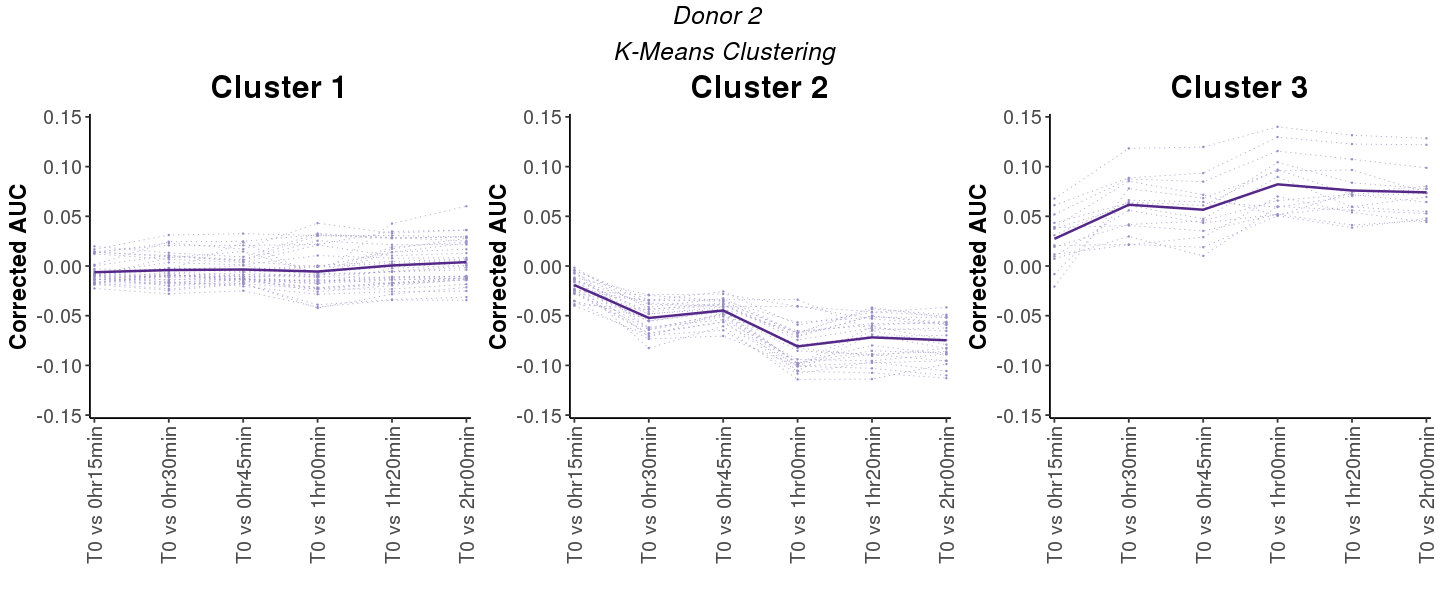

In [61]:
plotting_clusters_short(lps_auc_donor2_short_cluster2,
                        "Donor 2 \n K-Means Clustering",
                       colname_days2short2,
                        level_days2short2,
                        plot_limits2short2,
                        plot_labels2short2,
                        "#542788","#998ec3")

In [62]:
subset(lps_auc_donor2_short_cluster2, cluster == 1)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
E2F6_HUMAN.H11MO.0.A,-0.022557397,-0.027950781,-0.0248701828,-0.0412717909,-0.0342274310,-0.0343359921,1
E2F7_HUMAN.H11MO.0.B,-0.017049177,-0.023043495,-0.0172151799,-0.0422907728,-0.0283888719,-0.0214391863,1
EGR1_HUMAN.H11MO.0.A,-0.018370208,-0.017662257,-0.0178276064,-0.0232293115,-0.0231727457,-0.0184180331,1
EGR2_HUMAN.H11MO.0.A,-0.013530280,-0.009580646,-0.0127815715,-0.0148170590,-0.0136250061,-0.0118556433,1
IRF1_HUMAN.H11MO.0.A,-0.010536125,-0.011426465,-0.0133314517,-0.0179862051,-0.0023299192,0.0008979520,1
IRF2_HUMAN.H11MO.0.A,-0.006963933,-0.004391449,0.0004830766,-0.0100428143,0.0172678838,0.0278554698,1
IRF4_HUMAN.H11MO.0.A,0.016782619,0.031158176,0.0325534849,0.0306829876,0.0306552537,0.0292991752,1
IRF7_HUMAN.H11MO.0.C,-0.009995083,0.008371411,0.0145048183,-0.0073373872,0.0191547939,0.0242071663,1
IRF8_HUMAN.H11MO.0.B,0.014375540,0.020780711,0.0207324737,0.0216629028,0.0347734579,0.0361747422,1


In [63]:
subset(lps_auc_donor2_short_cluster2, cluster == 2)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
ELF1_HUMAN.H11MO.0.A,-0.019363314,-0.04840027,-0.04123573,-0.09916906,-0.06055765,-0.07442109,2
ELF2_HUMAN.H11MO.0.C,-0.012753857,-0.07133336,-0.04651859,-0.09749339,-0.07992313,-0.08888894,2
ELK1_HUMAN.H11MO.0.B,-0.024128946,-0.06167730,-0.05402199,-0.09392314,-0.09538653,-0.08843288,2
ELK4_HUMAN.H11MO.0.A,-0.035001469,-0.07344046,-0.07045655,-0.10050928,-0.09748359,-0.09523994,2
ETV1_HUMAN.H11MO.0.A,-0.022761056,-0.05539511,-0.04478203,-0.08259388,-0.09055002,-0.08248979,2
FOXI1_HUMAN.H11MO.0.B,-0.013693805,-0.04795327,-0.04338124,-0.06706815,-0.05782524,-0.05736203,2
FOXJ3_HUMAN.H11MO.0.A,-0.024571109,-0.02948207,-0.03470106,-0.05675271,-0.05152598,-0.05158978,2
GABPA_HUMAN.H11MO.0.A,-0.026977993,-0.06396751,-0.04803555,-0.09857084,-0.08865241,-0.08605849,2
KAISO_HUMAN.H11MO.0.A,-0.016436613,-0.08255128,-0.06058846,-0.11406393,-0.11375996,-0.09866280,2


In [64]:
subset(lps_auc_donor2_short_cluster2, cluster == 3)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AP2C_HUMAN.H11MO.0.A,0.007271529,0.02976317,0.01015580,0.05991570,0.05604382,0.05279517,3
BACH1_HUMAN.H11MO.0.A,0.043409566,0.06356559,0.05662849,0.10436574,0.08371994,0.07772743,3
BACH2_HUMAN.H11MO.0.A,0.037491118,0.06091718,0.04738554,0.08964059,0.05944163,0.05476473,3
COE1_HUMAN.H11MO.0.A,0.009602566,0.05599974,0.04329531,0.05207538,0.04121633,0.04583533,3
FOSL1_HUMAN.H11MO.0.A,-0.008138907,0.06624559,0.06444503,0.05928735,0.07051734,0.07317491,3
FOSL2_HUMAN.H11MO.0.A,-0.020731452,0.07794518,0.06825224,0.09578526,0.09658790,0.07396064,3
NFE2_HUMAN.H11MO.0.A,0.030922701,0.06425241,0.06095193,0.09696144,0.07166751,0.06434312,3
NFKB1_HUMAN.H11MO.1.B,0.061159461,0.08867199,0.09345652,0.12973150,0.12272567,0.12192531,3
NFKB2_HUMAN.H11MO.0.B,0.038586329,0.04074663,0.03529134,0.05190898,0.05964663,0.06947733,3


## Principle component analysis of the significant TFs

In [66]:
head(lps_auc_donor2_short2)
dim(lps_auc_donor2_short2)

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AP2C_HUMAN.H11MO.0.A,0.007271529,0.02976317,0.01015580,0.05991570,0.05604382,0.05279517
BACH1_HUMAN.H11MO.0.A,0.043409566,0.06356559,0.05662849,0.10436574,0.08371994,0.07772743
BACH2_HUMAN.H11MO.0.A,0.037491118,0.06091718,0.04738554,0.08964059,0.05944163,0.05476473
COE1_HUMAN.H11MO.0.A,0.009602566,0.05599974,0.04329531,0.05207538,0.04121633,0.04583533
E2F6_HUMAN.H11MO.0.A,-0.022557397,-0.02795078,-0.02487018,-0.04127179,-0.03422743,-0.03433599
E2F7_HUMAN.H11MO.0.B,-0.017049177,-0.02304350,-0.01721518,-0.04229077,-0.02838887,-0.02143919


[1] 78  6

In [67]:
##PCA for all samples

pc0 <- prcomp(lps_auc_donor2_short2)


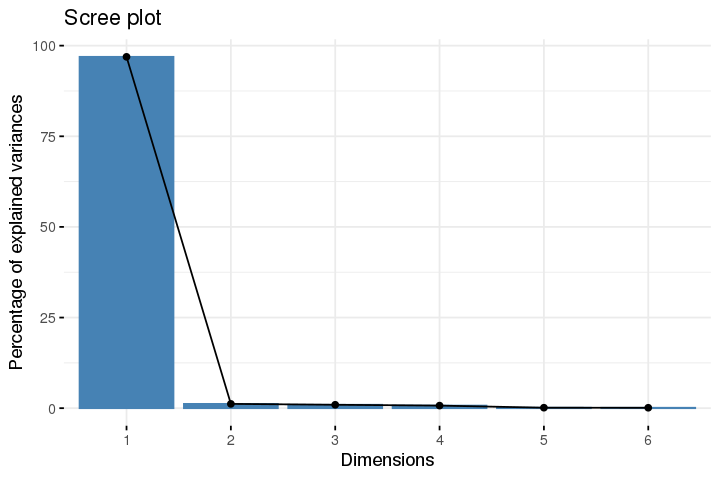

In [68]:
options(repr.plot.width=6, repr.plot.height=4)
fviz_eig(pc0)


In [87]:
#################################
##Percent of variance explained##
#################################
eigs <- pc0$sdev^2
(eigs[1] / sum(eigs))*100
(eigs[2] / sum(eigs))*100
(eigs[3] / sum(eigs))*100
(eigs[4] / sum(eigs))*100

[1] 96.913

[1] 1.184321

[1] 0.9403555

[1] 0.7130837

In [91]:
pc_df0 <- as.data.frame(pc0$x[, 1])
colnames(pc_df0) <- "PC1"
pc_df0$PC2 <-  pc0$x[, 2]
pc_df0$PC3 <-  pc0$x[, 3]
pc_df0$PC4 <-  pc0$x[, 4]


In [74]:
cluster_info <- lps_auc_donor2_short_cluster2[c(7)]

In [76]:
pc_df <- merge(pc_df0, cluster_info, by="row.names")

In [79]:
head(pc_df)

Row.names,PC1,PC2,PC3,PC4,cluster
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AP2C_HUMAN.H11MO.0.A,-0.12189885,-0.012620437,-0.010416061,-0.021192022,3
BACH1_HUMAN.H11MO.0.A,-0.20348407,0.020402772,-0.005307808,-0.012049700,3
BACH2_HUMAN.H11MO.0.A,-0.16812567,0.028293424,-0.013349142,-0.004629327,3
COE1_HUMAN.H11MO.0.A,-0.12805414,0.006733496,-0.009979439,0.018319642,3
E2F6_HUMAN.H11MO.0.A,0.05345514,-0.008615928,-0.005580712,0.001553071,1
E2F7_HUMAN.H11MO.0.B,0.03979508,-0.010071533,0.004349521,0.004502244,1


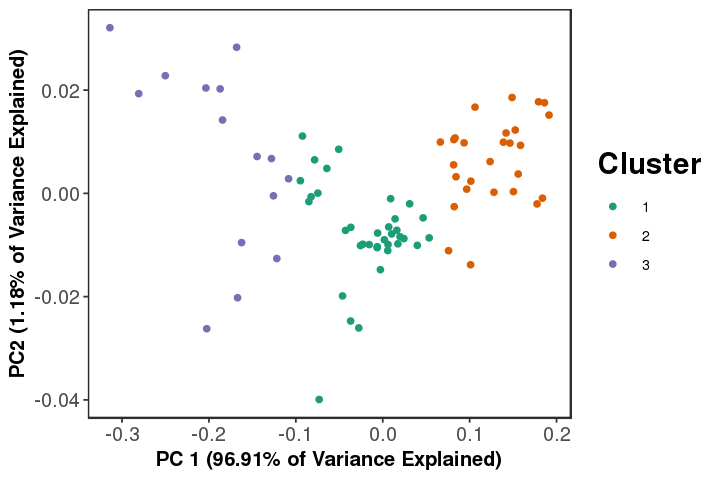

In [154]:
pca_clusters <- ggplot(pc_df, aes(PC1, PC2, color=as.factor(cluster))) +
                xlab("PC 1 (96.91% of Variance Explained)") + ylab("PC2 (1.18% of Variance Explained)") +
                #ggtitle("Principle Components of Trajectories") +
                    geom_point() + theme_bw() +
                    scale_color_brewer(name = "Cluster", palette="Dark2")+
                    theme(panel.grid.major = element_blank(), 
                          panel.grid.minor = element_blank(),
                          panel.background = element_rect(colour = "black", size=0.75))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 18, face = "bold"), 
                          axis.title = element_text(size = 12,face = "bold"), 
                          axis.text = element_text(size = 12))

pca_clusters

In [156]:
ggsave("pca_clusters_0hrs_2hrs_20191113.pdf", pca_clusters, width = 6, height = 4)

In [92]:
brewer.pal(n = 8, name = "Dark2")

[1] "#1B9E77" "#D95F02" "#7570B3" "#E7298A" "#66A61E" "#E6AB02" "#A6761D"
[8] "#666666"

In [93]:
head(subset(lps_auc_donor2_short_cluster2, cluster == 1))

,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
E2F6_HUMAN.H11MO.0.A,-0.022557397,-0.027950781,-0.0248701828,-0.04127179,-0.034227431,-0.034335992,1
E2F7_HUMAN.H11MO.0.B,-0.017049177,-0.023043495,-0.0172151799,-0.04229077,-0.028388872,-0.021439186,1
EGR1_HUMAN.H11MO.0.A,-0.018370208,-0.017662257,-0.0178276064,-0.02322931,-0.023172746,-0.018418033,1
EGR2_HUMAN.H11MO.0.A,-0.013530280,-0.009580646,-0.0127815715,-0.01481706,-0.013625006,-0.011855643,1
IRF1_HUMAN.H11MO.0.A,-0.010536125,-0.011426465,-0.0133314517,-0.01798621,-0.002329919,0.000897952,1
IRF2_HUMAN.H11MO.0.A,-0.006963933,-0.004391449,0.0004830766,-0.01004281,0.017267884,0.027855470,1


In [135]:
##create brakes for donor2
colname_final_plot <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                        "T0_1hr20min","T0_2hr00min","TF")

level_final_plot <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                      "T0_1hr20min","space1","space2","T0_2hr00min")

limits_final_plot <- c("T0","T0_0hr15min","T0_0hr30min","T0_0hr45min","T0_1hr00min",
                       "T0_1hr20min","space1","space2","T0_2hr00min")

labels_final_plot <- c("0","0.25","0.50","0.75",
                       "1.00", "1.30"," ", " ", "2.00")

In [128]:
head(lps_auc_donor2_short_cluster2)
dim(lps_auc_donor2_short_cluster2)


,00hr00mindonor2_00hr15mindonor2_TFEA.txt,00hr00mindonor2_00hr30mindonor2_TFEA.txt,00hr00mindonor2_00hr45mindonor2_TFEA.txt,00hr00mindonor2_01hr00mindonor2_TFEA.txt,00hr00mindonor2_01hr20mindonor2_TFEA.txt,00hr00mindonor2_02hr00mindonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AP2C_HUMAN.H11MO.0.A,0.007271529,0.02976317,0.01015580,0.05991570,0.05604382,0.05279517,3
BACH1_HUMAN.H11MO.0.A,0.043409566,0.06356559,0.05662849,0.10436574,0.08371994,0.07772743,3
BACH2_HUMAN.H11MO.0.A,0.037491118,0.06091718,0.04738554,0.08964059,0.05944163,0.05476473,3
COE1_HUMAN.H11MO.0.A,0.009602566,0.05599974,0.04329531,0.05207538,0.04121633,0.04583533,3
E2F6_HUMAN.H11MO.0.A,-0.022557397,-0.02795078,-0.02487018,-0.04127179,-0.03422743,-0.03433599,1
E2F7_HUMAN.H11MO.0.B,-0.017049177,-0.02304350,-0.01721518,-0.04229077,-0.02838887,-0.02143919,1


[1] 78  7

In [131]:
T0_lps_auc_donor2_short_cluster2<- data.frame(T0 =(rep(0, nrow(lps_auc_donor2_short_cluster2))),
                                              lps_auc_donor2_short_cluster2)

In [132]:
head(T0_lps_auc_donor2_short_cluster2)

,T0,X00hr00mindonor2_00hr15mindonor2_TFEA.txt,X00hr00mindonor2_00hr30mindonor2_TFEA.txt,X00hr00mindonor2_00hr45mindonor2_TFEA.txt,X00hr00mindonor2_01hr00mindonor2_TFEA.txt,X00hr00mindonor2_01hr20mindonor2_TFEA.txt,X00hr00mindonor2_02hr00mindonor2_TFEA.txt,cluster
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
AP2C_HUMAN.H11MO.0.A,0,0.007271529,0.02976317,0.01015580,0.05991570,0.05604382,0.05279517,3
BACH1_HUMAN.H11MO.0.A,0,0.043409566,0.06356559,0.05662849,0.10436574,0.08371994,0.07772743,3
BACH2_HUMAN.H11MO.0.A,0,0.037491118,0.06091718,0.04738554,0.08964059,0.05944163,0.05476473,3
COE1_HUMAN.H11MO.0.A,0,0.009602566,0.05599974,0.04329531,0.05207538,0.04121633,0.04583533,3
E2F6_HUMAN.H11MO.0.A,0,-0.022557397,-0.02795078,-0.02487018,-0.04127179,-0.03422743,-0.03433599,1
E2F7_HUMAN.H11MO.0.B,0,-0.017049177,-0.02304350,-0.01721518,-0.04229077,-0.02838887,-0.02143919,1


In [133]:
df_gather1 <- restructure_df(subset(lps_auc_donor2_short_cluster2, cluster == 1),
                             colname_days2short2 , level_days2short2)
head(df_gather1)

TF,key,val,keys
<chr>,<chr>,<dbl>,<fct>
E2F6_HUMAN.H11MO.0.A,T0_0hr15min,-0.022557397,T0_0hr15min
E2F7_HUMAN.H11MO.0.B,T0_0hr15min,-0.017049177,T0_0hr15min
EGR1_HUMAN.H11MO.0.A,T0_0hr15min,-0.018370208,T0_0hr15min
EGR2_HUMAN.H11MO.0.A,T0_0hr15min,-0.013530280,T0_0hr15min
IRF1_HUMAN.H11MO.0.A,T0_0hr15min,-0.010536125,T0_0hr15min
IRF2_HUMAN.H11MO.0.A,T0_0hr15min,-0.006963933,T0_0hr15min


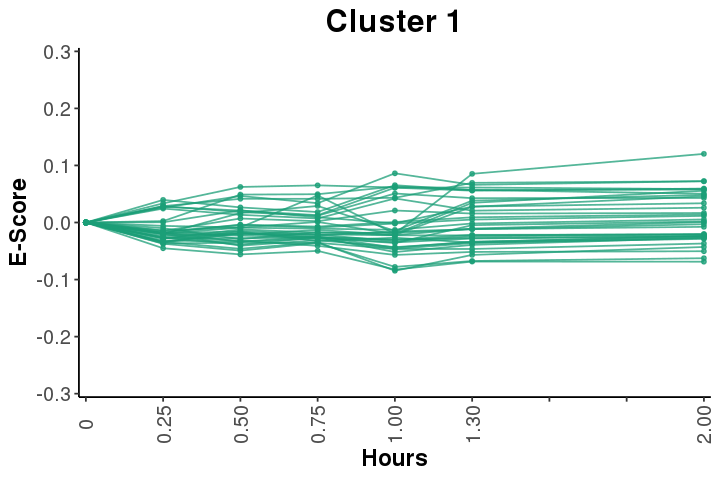

In [144]:
df_gather1 <- restructure_df(subset(T0_lps_auc_donor2_short_cluster2, cluster == 1),
                             colname_final_plot , level_final_plot)

    
########################################################
########Now plotting the clusters as line plots#########
########################################################

cluster_plt1 <- ggplot(data=df_gather1, aes(x=keys, y=(val)*2, group=TF)) +
                    geom_line(linetype = "solid",size=0.5, colour='#1B9E77', alpha=0.75)+  
                    geom_point(size=1, colour='#1B9E77', alpha=0.79)+ 
                    labs(title = "Cluster 1",
                         x = "Hours", y = "E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=limits_final_plot,
                                     labels=labels_final_plot,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

cluster_plt1

In [152]:
ggsave("cluster1_Escores_20191113.pdf", cluster_plt1, width = 5, height = 4)

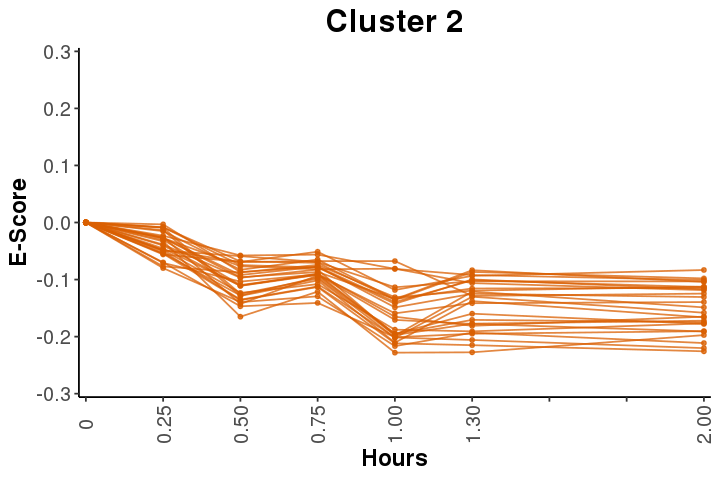

In [142]:
df_gather2 <- restructure_df(subset(T0_lps_auc_donor2_short_cluster2, cluster == 2),
                              colname_final_plot , level_final_plot)


########################################################
########Now plotting the clusters as line plots#########
########################################################

cluster_plt2 <- ggplot(data=df_gather2, aes(x=keys, y=(val)*2, group=TF)) +
                    geom_line(linetype = "solid",size=0.5, colour='#D95F02', alpha=0.75)+  
                    geom_point(size=1, colour='#D95F02', alpha=0.79)+ 
                    labs(title = "Cluster 2",
                         x = "Hours", y = "E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=limits_final_plot,
                                     labels=labels_final_plot,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

cluster_plt2

In [153]:
ggsave("cluster2_Escores_20191113.pdf", cluster_plt2, width = 5, height = 4)

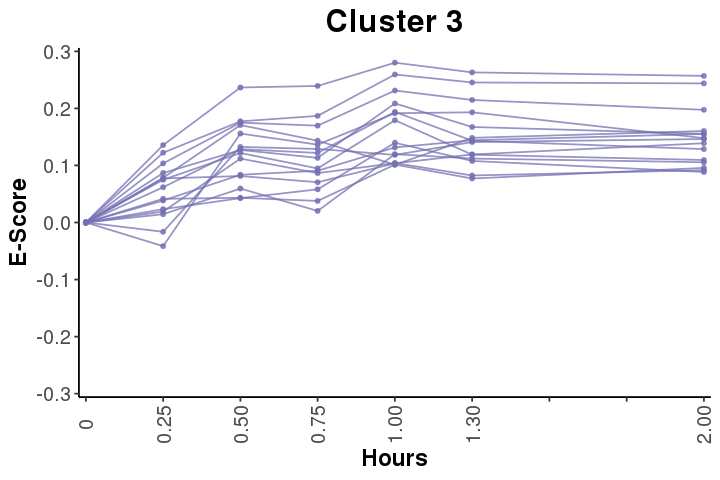

In [143]:
df_gather3 <- restructure_df(subset(T0_lps_auc_donor2_short_cluster2, cluster == 3),
                              colname_final_plot , level_final_plot)


########################################################
########Now plotting the clusters as line plots#########
########################################################

cluster_plt3 <- ggplot(data=df_gather3, aes(x=keys, y=(val)*2, group=TF)) +
                    geom_line(linetype = "solid",size=0.5, colour='#7570B3', alpha=0.75)+  
                    geom_point(size=1, colour='#7570B3', alpha=0.79)+ 
                    labs(title = "Cluster 3",
                         x = "Hours", y = "E-Score") + 
                    theme_classic() + 
                    scale_y_continuous(expand = c(0.01,0),limits = c(-0.3, 0.3)) +
                    scale_x_discrete(limit=limits_final_plot,
                                     labels=labels_final_plot,
                                     expand=c(0.01, 0.01))+
                    theme(plot.title = element_text(hjust = 0.5),
                          title = element_text(size = 16, face = "bold"), 
                          axis.title = element_text(size = 14), 
                          axis.text = element_text(size = 12),
                          axis.text.x = element_text(size = 12, angle = 90, 
                                                     hjust = 0.5, vjust = 0.5))

cluster_plt3

In [151]:
ggsave("cluster3_Escores_20191113.pdf", cluster_plt3, width = 5, height = 4)
